In [1]:
from trace_process_utils import *

mpl.rcParams['figure.dpi'] = 250

from pprint import pprint

## Original traces

In [2]:
# collection settings
sample_interval = 2e-9 # 2ns
fs = int(1/sample_interval)

In [3]:
trs_folder = "/mnt/jbod_main/public/qsp/trace_copilot/traces/"
trs_file = "nrf52840.tinyaes_random_disable.O3.ori.50000.2.chB.trs"
trs_path = trs_folder + trs_file

traces_ori, pts_ori = get_pico3203D_Trs(trs_path)

print(pts_ori.shape, pts_ori[0,:])
print(traces_ori.shape)

cryptoDataCount = 32
sampleLength = 2
sampleCoding = 0
pointNumber = 50000
traceNumber = 2
traceFile = /mnt/jbod_main/public/qsp/trace_copilot/traces/nrf52840.tinyaes_random_disable.O3.ori.50000.2.chB.trs
[#########################                         ] 50% Extract Crypto Data Running...(2, 32) [ 57  12 140 125 114  71  52  44 216  16  15  47 111 119  13 101   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
(2, 50000)


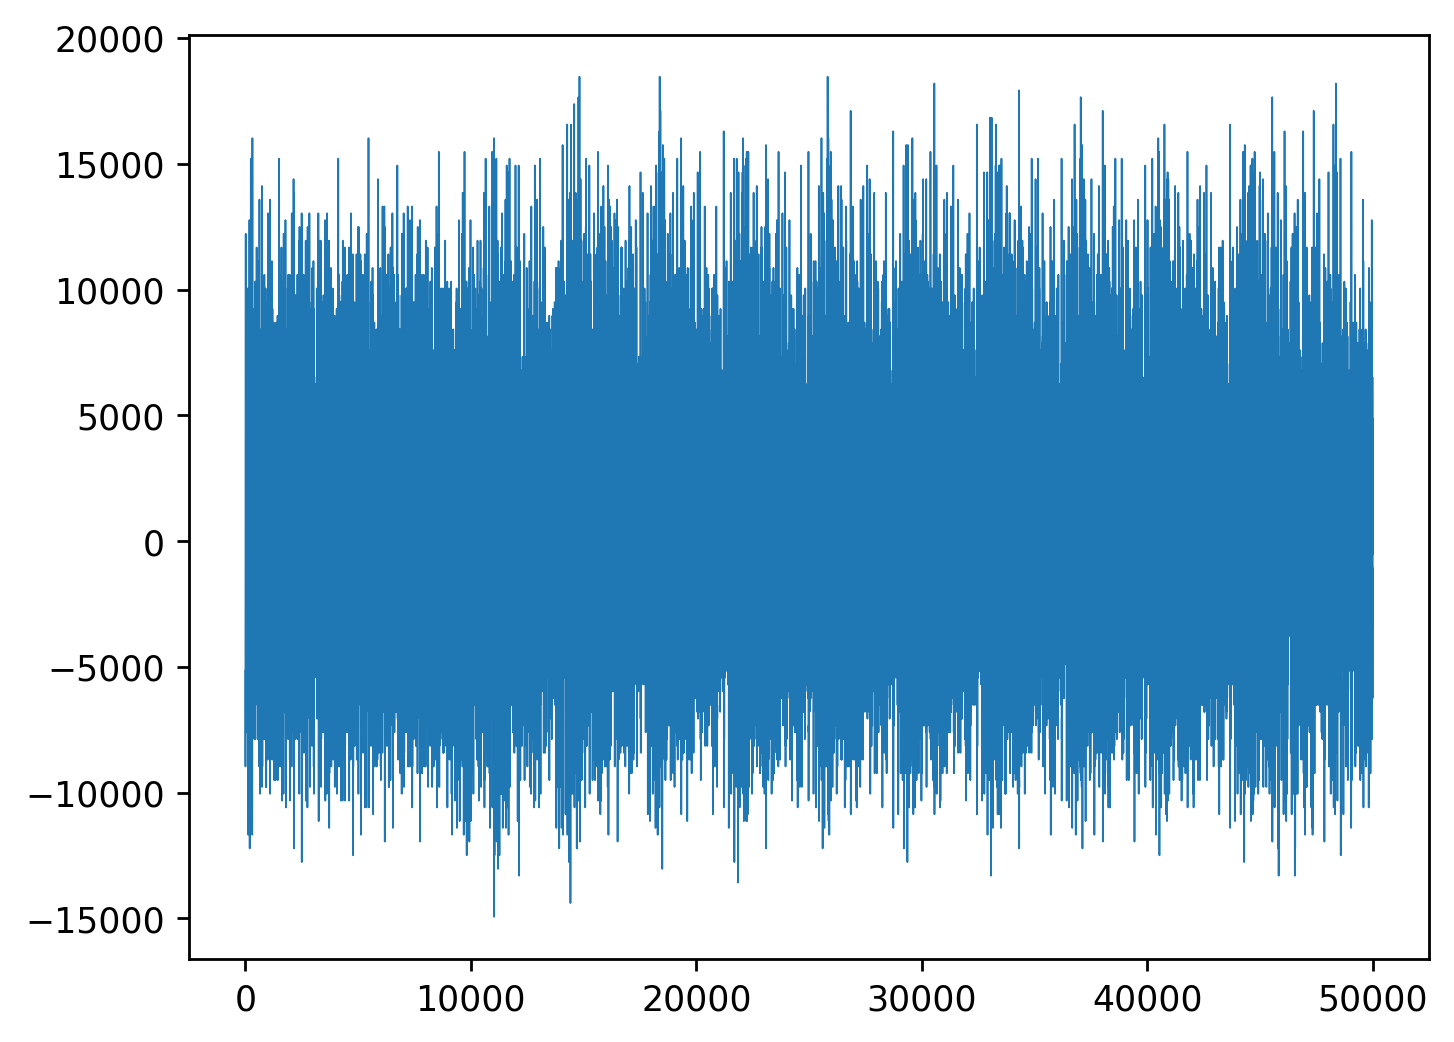

In [4]:
plt.plot(traces_ori[0, :], linewidth=0.5)
plt.show()

In [5]:
trs_folder = "/mnt/jbod_main/public/qsp/trace_copilot/traces/"
trs_file = "nrf52840.tinyaes_random_disable.O3.ori.50000.2.chA.trs"
trs_path = trs_folder + trs_file

trigger_trace_ori, _ = get_pico3203D_Trs(trs_path)

cryptoDataCount = 32
sampleLength = 2
sampleCoding = 0
pointNumber = 50000
traceNumber = 2
traceFile = /mnt/jbod_main/public/qsp/trace_copilot/traces/nrf52840.tinyaes_random_disable.O3.ori.50000.2.chA.trs
[#########################                         ] 50% Extract Crypto Data Running...

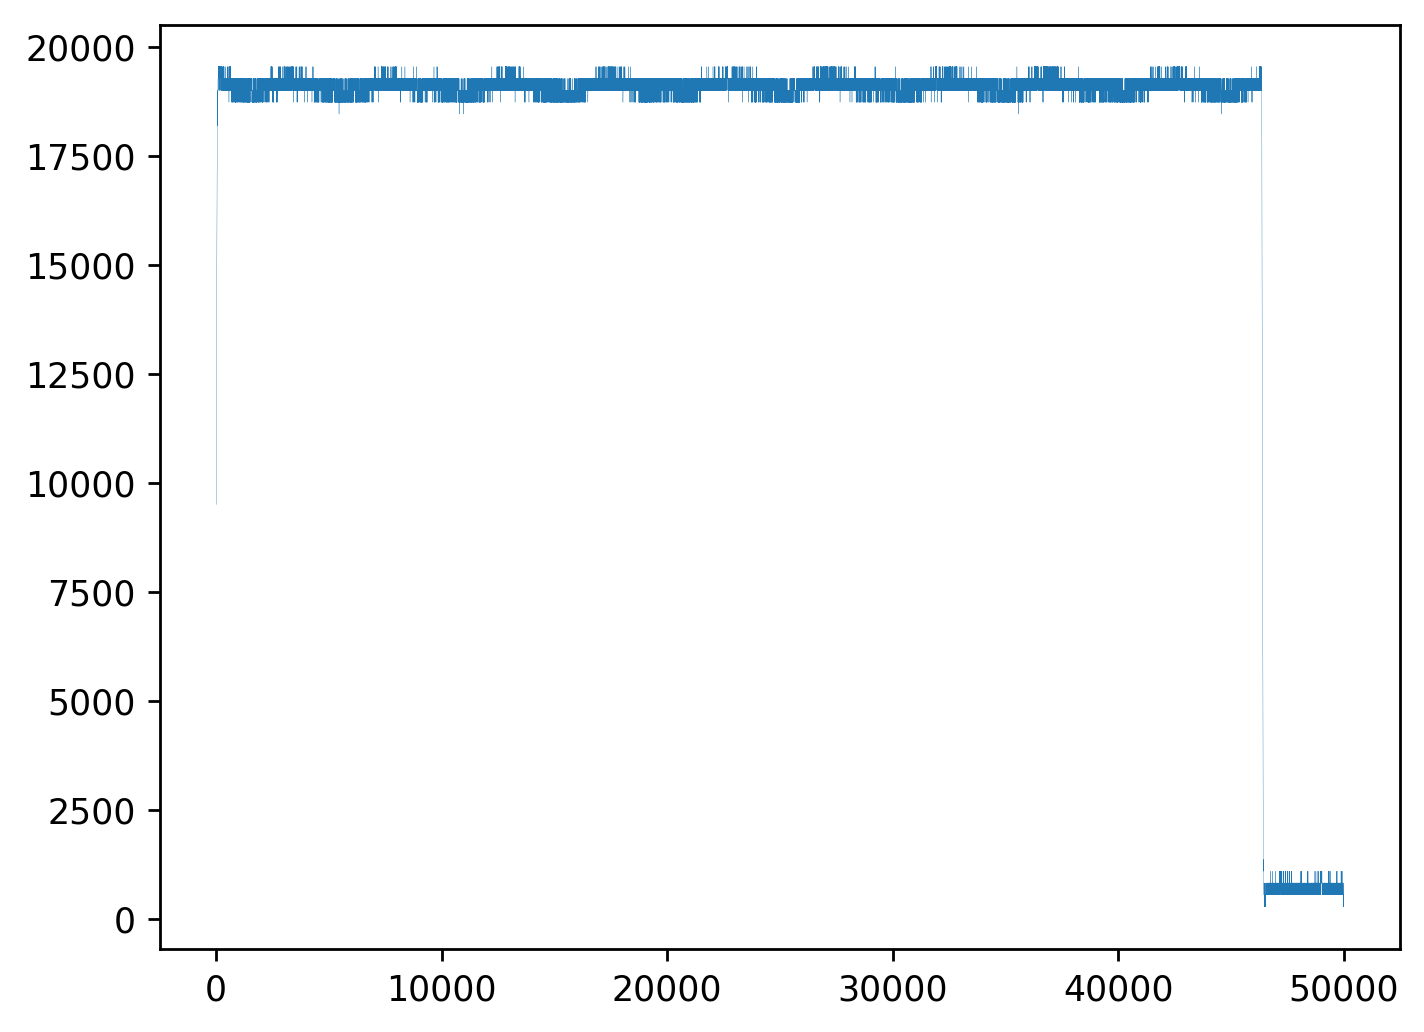

In [6]:
plt.plot(trigger_trace_ori[0, :], linewidth=0.1)
plt.show()

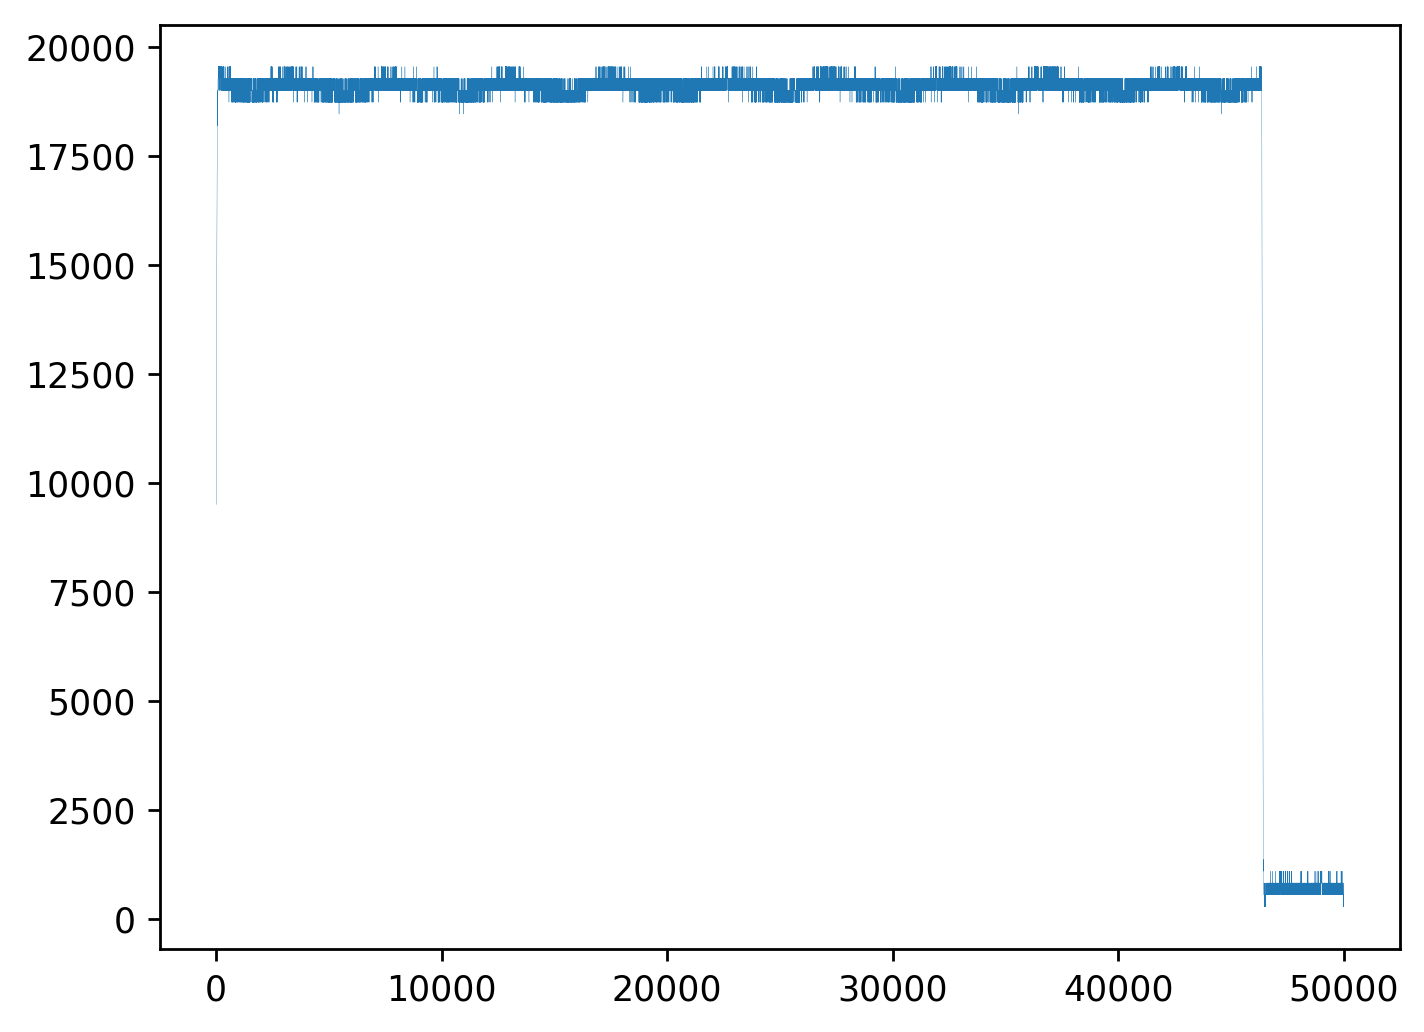

In [7]:
start_ori = 0
end_ori = trigger_trace_ori[0, :].shape[0]
trigger_trace_ori_local = trigger_trace_ori[0, start_ori:end_ori]
plt.plot(trigger_trace_ori_local, linewidth=0.1)
plt.show()

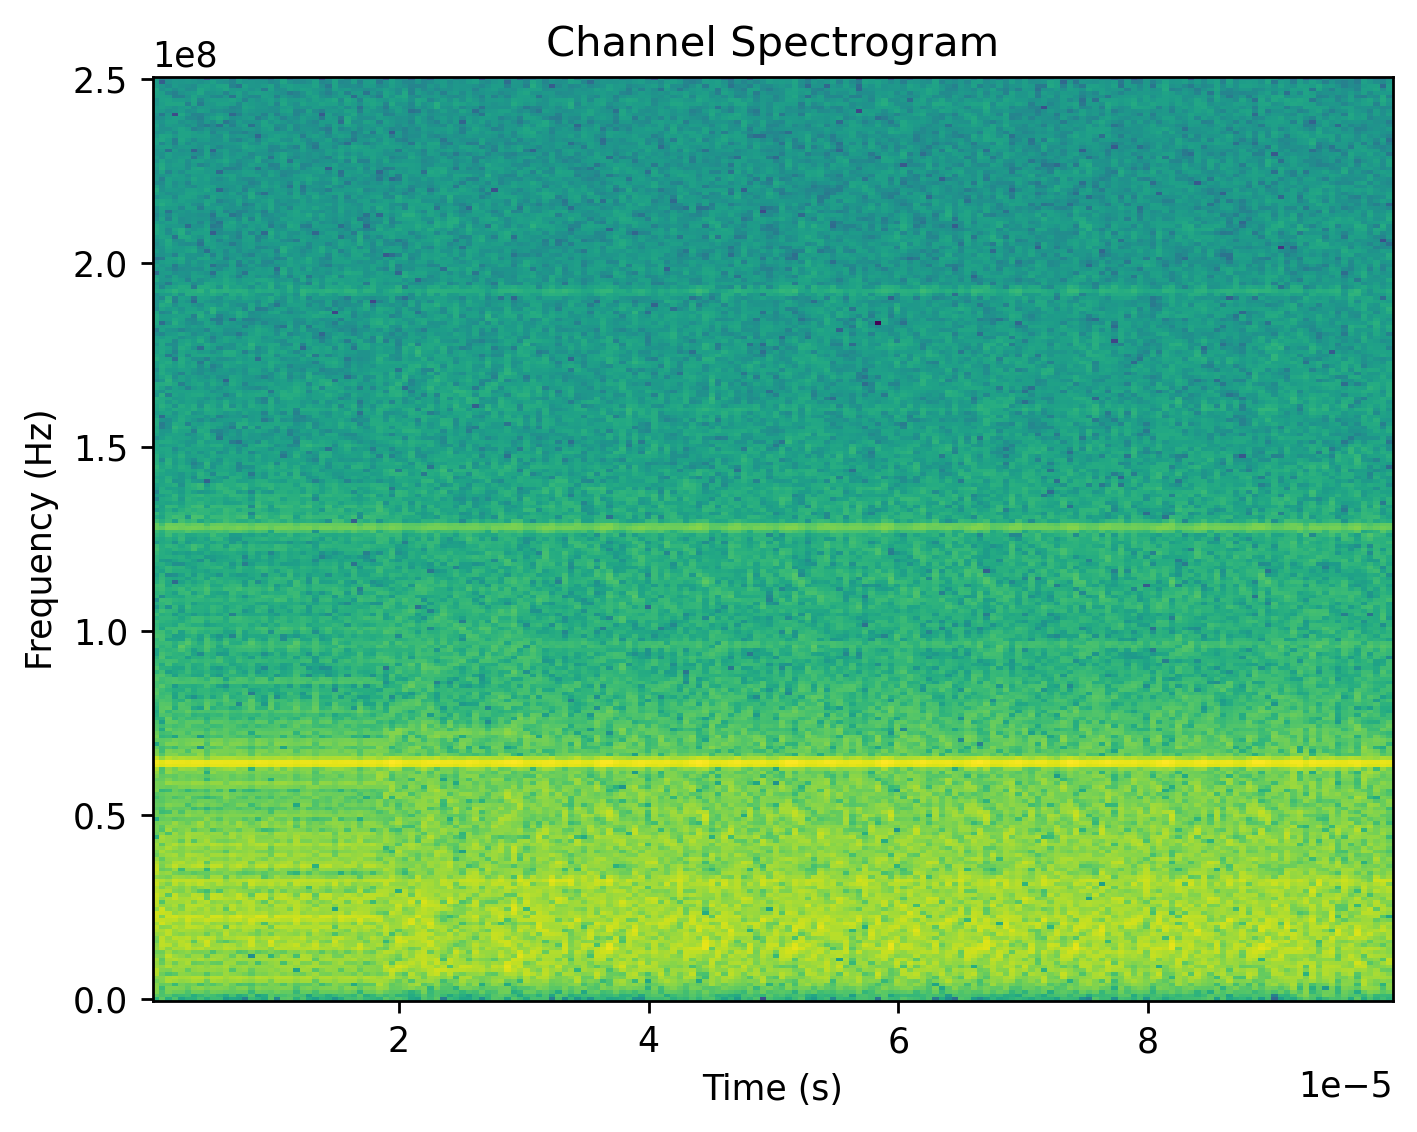

In [8]:
start = 0
end = traces_ori[0,:].shape[0]
plot_spectrom(channel_data=traces_ori[0, start:end], fs=int(1/sample_interval)) 

## Instrumented traces

In [9]:
trs_folder = "/mnt/jbod_main/public/qsp/trace_copilot/traces/"
# trs_file = "nrf52840.tinyaes.O3.patched.500000.5000.chB.trs"
trs_file = "nrf52840.tinyaes_random_disable.O3.patched.50000.2.chB.trs"
trs_path = trs_folder + trs_file

traces_patched, pts_patched = get_pico3203D_Trs(trs_path)

print(pts_patched.shape, pts_patched[0,:])
print(traces_patched.shape)

cryptoDataCount = 32
sampleLength = 2
sampleCoding = 0
pointNumber = 50000
traceNumber = 2
traceFile = /mnt/jbod_main/public/qsp/trace_copilot/traces/nrf52840.tinyaes_random_disable.O3.patched.50000.2.chB.trs
[#########################                         ] 50% Extract Crypto Data Running...(2, 32) [ 57  12 140 125 114  71  52  44 216  16  15  47 111 119  13 101   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
(2, 50000)


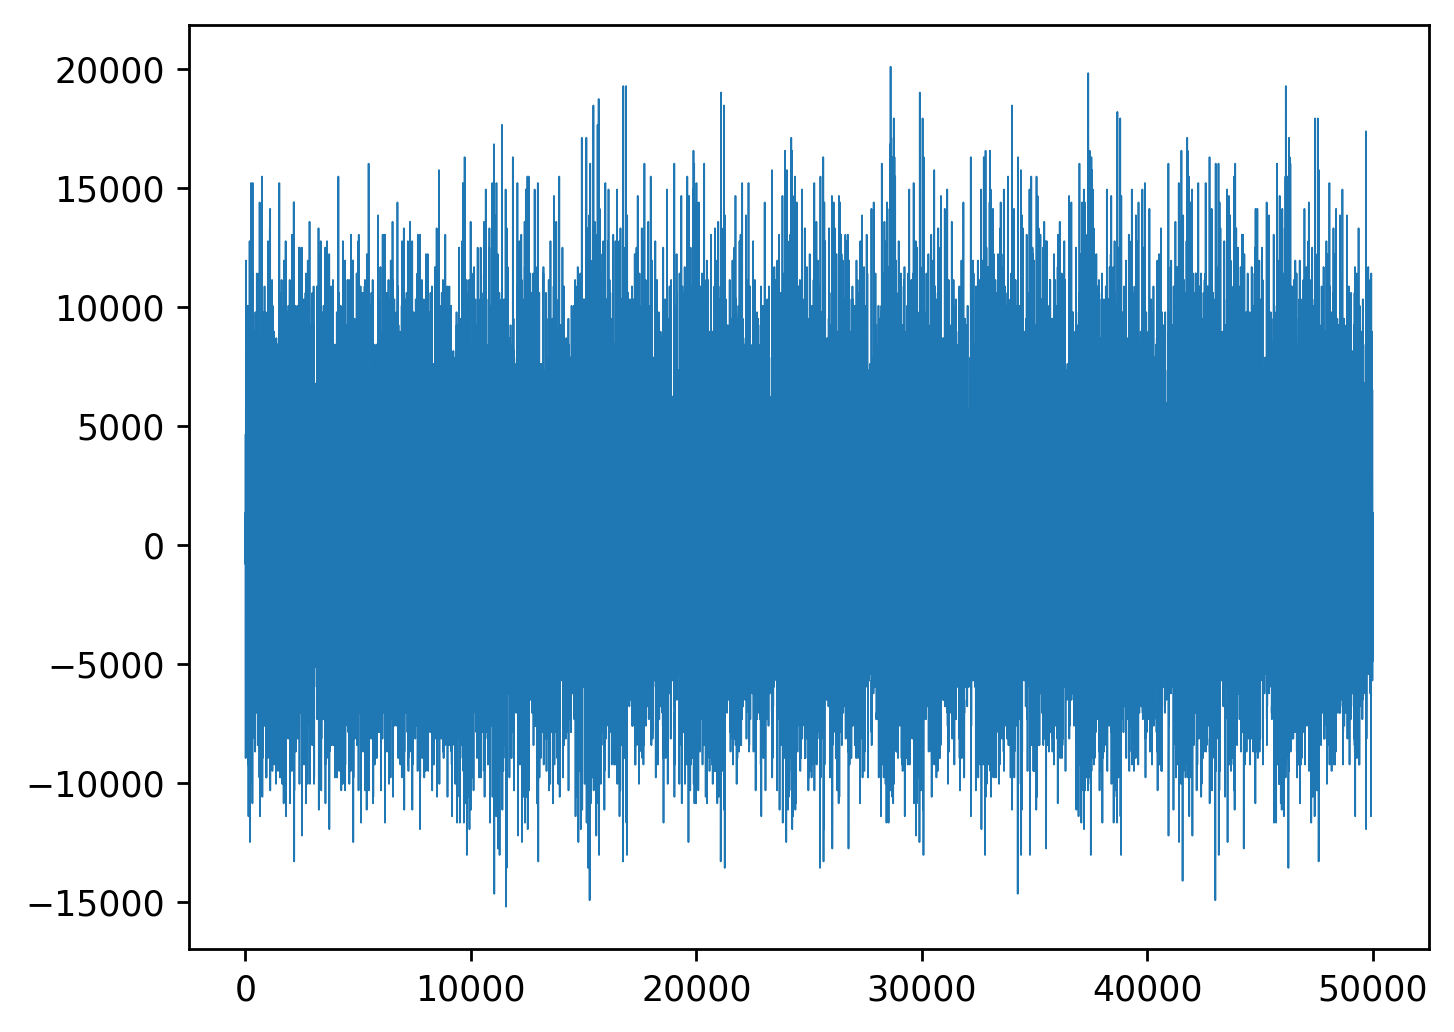

In [10]:
plt.plot(traces_patched[0, :], linewidth=0.5)
plt.show()

In [11]:
trs_folder = "/mnt/jbod_main/public/qsp/trace_copilot/traces/"
trs_file = "nrf52840.tinyaes_random_disable.O3.patched.50000.2.chA.trs"
trs_path = trs_folder + trs_file

trigger_trace_patched, _ = get_pico3203D_Trs(trs_path)

cryptoDataCount = 32
sampleLength = 2
sampleCoding = 0
pointNumber = 50000
traceNumber = 2
traceFile = /mnt/jbod_main/public/qsp/trace_copilot/traces/nrf52840.tinyaes_random_disable.O3.patched.50000.2.chA.trs
[#########################                         ] 50% Extract Crypto Data Running...

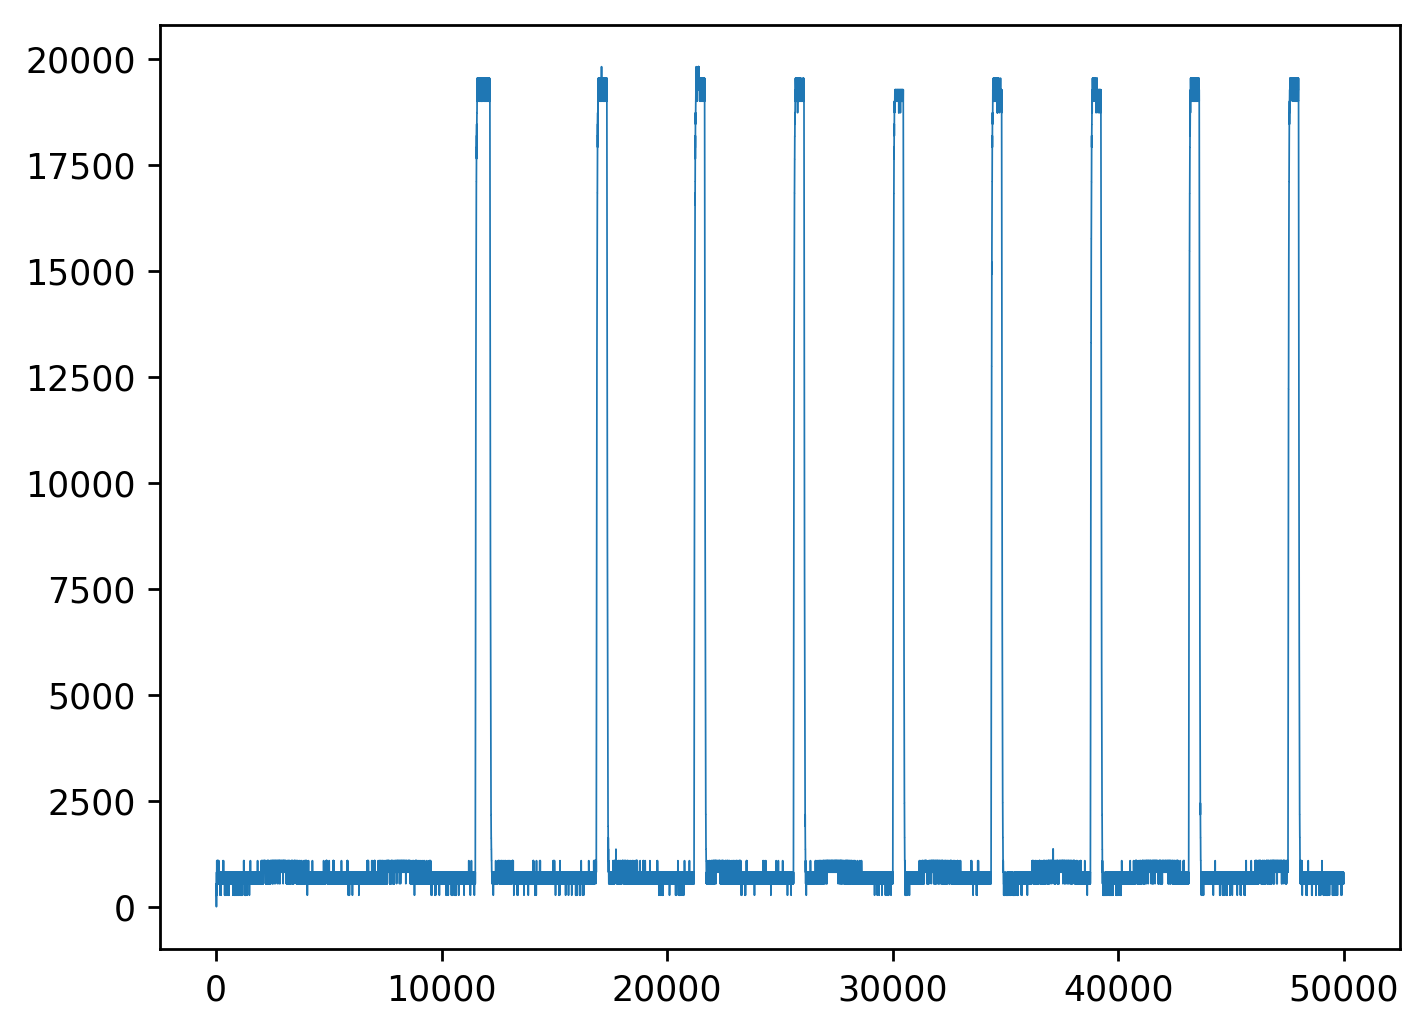

In [12]:
start_patched = 0 
end_patched = trigger_trace_patched[0, :].shape[0]
# DEBUG
trigger_trace_patched_local = trigger_trace_patched[0, start_patched:end_patched]
plt.plot(trigger_trace_patched_local, linewidth=0.5)
plt.show()

In [13]:
# # plot figures for paper

# start = 0 # 4_000 #  // len(traces_patched[0, :]) 
# end = start + 100_000

# axis_font = 8

# plt.plot(traces_patched[0, start:end]*2, linewidth=0.1, color='b')
# plt.xlabel('Time (ns)')


# plt.plot((trigger_trace_patched[0, start:end]-10000)*3.5, linewidth=0.3, color='r')

# plt.legend(["EM side-channel trace", 'Marker signal'], loc=1, prop={'size': 7})
# frame1 = plt.gca()

# frame1.xaxis.label.set_size(axis_font)
# frame1.axes.yaxis.set_ticklabels([])

# # ## spectrum plot start
# # sample_interval = 2e-9 # 2ns
# # fs = int(1/sample_interval)
# # channel_data=traces_patched[0, start:end]
# # low_pass_freq=0.5e8
# # nperseg = 512  # Number of points in each segment
# # noverlap = nperseg // 2  # Overlap between segments
# # window = signal.windows.hann(nperseg)  # Window function


# # if low_pass_freq is not None:
# #     # low pass filter
# #     nyquist_freq = fs / 2  # Nyquist frequency
# #     cutoff_freq = low_pass_freq  # Cutoff frequency (Hz)
# #     b, a = signal.butter(4, cutoff_freq/nyquist_freq, 'low')  # Generate filter coefficients
# #     filtered_channel_data = signal.lfilter(b, a, channel_data)

# #     # Calculate the spectrogram using Scipy
# #     f, t, Sxx = signal.spectrogram(filtered_channel_data, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)
# # else:
# #     # Calculate the spectrogram using Scipy
# #     f, t, Sxx = signal.spectrogram(channel_data, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)

# # # Plot the spectrogram
# # plt.pcolormesh(t, f, 10*np.log10(Sxx))

# plt.ylabel('Amplitude after normalization.')
# # plt.xlabel('Time (s)')
# plt.title('Side channel traces in time domain')

# # ## spectrum plot end

# # plt.savefig("co-time-domain.svg")
# plt.savefig("co-time-domain.png")
# plt.show()

In [14]:
# # plot figures for paper

# sample_interval = 2e-9 # 2ns
# fs = int(1/sample_interval)
# # SAMPLE_NUM = 500_000
# # plot_spectrom(channel_data=traces_patched[0, start:end], fs=fs, low_pass_freq=0.5e8) 

# channel_data=traces_patched[0, start:end]
# fs=fs
# low_pass_freq = None
# nperseg = 512  # Number of points in each segment
# noverlap = nperseg // 2  # Overlap between segments
# window = signal.windows.hann(nperseg)  # Window function


# if low_pass_freq is not None:
#     # low pass filter
#     nyquist_freq = fs / 2  # Nyquist frequency
#     cutoff_freq = low_pass_freq  # Cutoff frequency (Hz)
#     b, a = signal.butter(4, cutoff_freq/nyquist_freq, 'low')  # Generate filter coefficients
#     filtered_channel_data = signal.lfilter(b, a, channel_data)

#     # Calculate the spectrogram using Scipy
#     f, t, Sxx = signal.spectrogram(filtered_channel_data, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)
# else:
#     # Calculate the spectrogram using Scipy
#     f, t, Sxx = signal.spectrogram(channel_data, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)

# # Plot the spectrogram
# plt.pcolormesh(t, f, 10*np.log10(Sxx))

# frame1 = plt.gca()

# axis_font = 8
# plt.xticks(fontsize=axis_font)
# # frame1.axes.yaxis.set_ticklabels([])

# plt.ylabel('Frequency (Hz)')
# plt.xlabel('Time (s)')
# plt.title('Trace spectrogram, FFT length=512 points')

# plt.savefig("co-freq-domain.png")
# plt.show()

[[11483 16850 21187 25594 30001 34360 38766 43125 47529]
 [12179 17368 21704 26111 30517 34876 39282 43641 48047]]


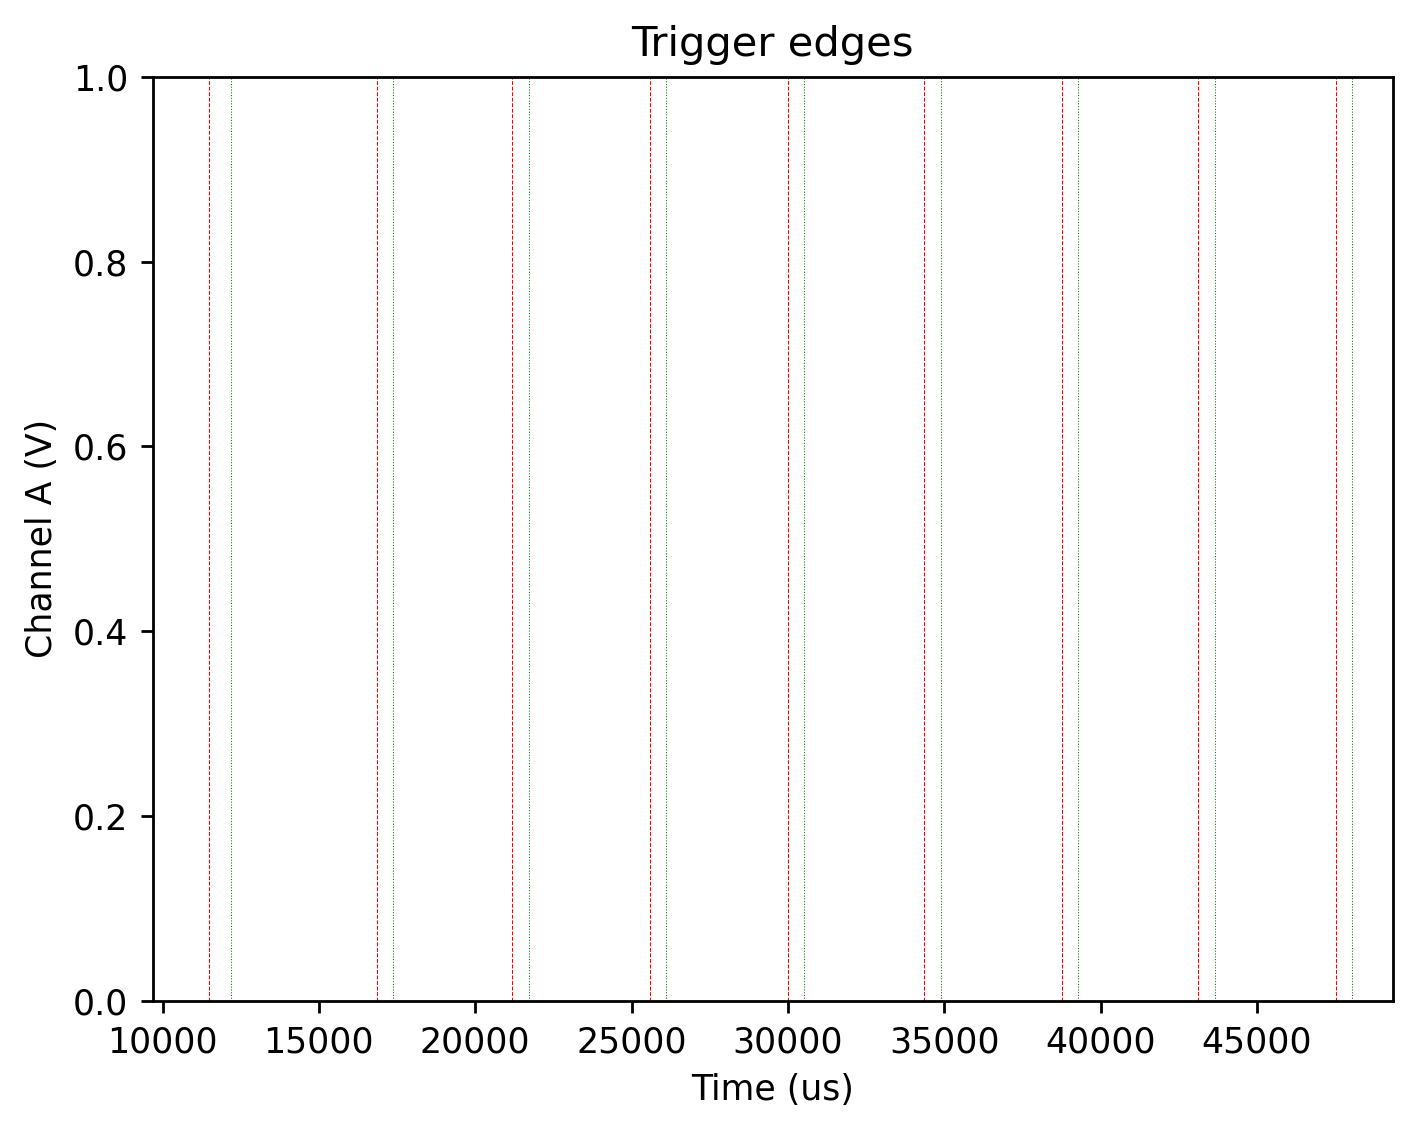

In [15]:
def get_trigger_edges(trigger_trace, threshold = 0.3):
    max_scale = np.max(trigger_trace)
    rising_edges = []
    falling_edges = []
    INT_RAISE_CYCLES = 16
    INT_FALL_CYCLES = 12
    MAX_IDX = len(trigger_trace)
    mode = 0 # 0 for rising, 1 for falling
    for i,v in enumerate(trigger_trace):
        if mode == 0 and v > threshold * max_scale:
            mode = 1
            rising_edges.append(max(0, i-INT_RAISE_CYCLES))
            continue
        elif mode == 1 and v < threshold * max_scale:
            mode = 0
            falling_edges.append(min(MAX_IDX, i + INT_FALL_CYCLES))
            continue
    return np.array([rising_edges, falling_edges])

# trigger_edges = get_trigger_edges(trigger_trace_patched[0, :])
trigger_edges = get_trigger_edges(trigger_trace_patched_local)

print(trigger_edges)

# plt.plot(data[0, :], data[1, :], linewidth=0.5)
for edges in trigger_edges[0, :]:
    plt.axvline(x=edges, color='r', linestyle='--', linewidth=0.3)
for edges in trigger_edges[1, :]:
    plt.axvline(x=edges, color='g', linestyle=':', linewidth=0.3)

plt.xlabel('Time (us)')
plt.ylabel('Channel A (V)')
plt.title('Trigger edges')
plt.show()

In [16]:
def remove_trigger_segs(data, trigger_edges):
    trace_output = []
    x = 0
    y = 0
    for i,d in enumerate(data):
        if x>= trigger_edges.shape[1]:
            # no edges remain
            trace_output.append(d)
        elif y == 0:
            if i<trigger_edges[y][x]:
                trace_output.append(d)
            else:
                y = 1
        else:
            if i>trigger_edges[y][x]:
                x += 1
                y = 0

    return np.array(trace_output)

# plot figures for paper: after removal
# trace_without_triggers = remove_trigger_segs(traces_patched[0, :], trigger_edges)

# plt.plot(trace_without_triggers[:], linewidth=0.3)
# plt.plot(traces_ori[0, :], linewidth=0.3)
# plt.show()
# sample_interval = 2e-9 # 2ns
# plot_spectrom(channel_data=trace_without_triggers[:], fs=int(1/sample_interval)) 

/tmp/ipykernel_189787/500954358.py:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


(50000,)
[[11483 16850 21187 25594 30001 34360 38766 43125 47529]
 [12179 17368 21704 26111 30517 34876 39282 43641 48047]]
avg width: 3966


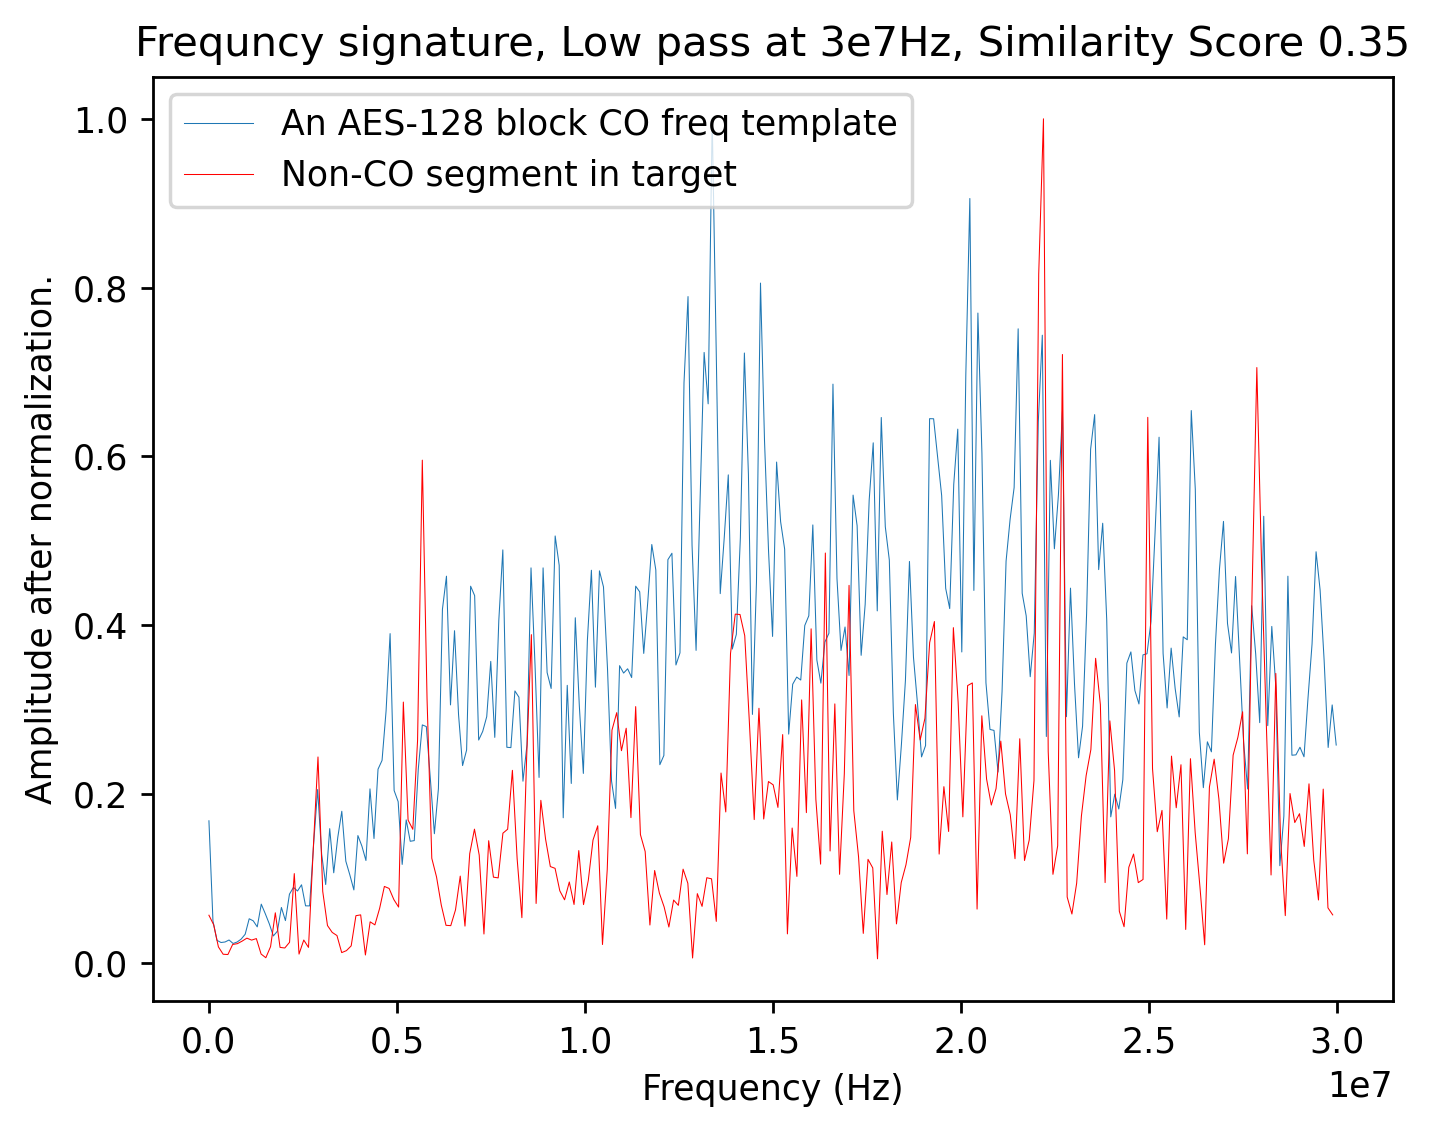

100%|██████████| 4604/4604 [00:04<00:00, 954.89it/s] 


In [17]:
from scipy.fft import fft, fftfreq
from scipy.stats.stats import pearsonr
from tqdm import tqdm

def similar_index_freq(x1, y1, x2, y2):
    # make sure x1 is longer
    if len(x1)<len(x2):
        x1, y1, x2, y2 = x2, y2, x1, y1
    y2_new = np.interp(x1*(x2[-1]/x1[-1]), x2, y2)
    score, pvalue = pearsonr(y1, y2_new)
    return score

def similar_index_freq_sad(x1, y1, x2, y2):
    # make sure x1 is longer
    if len(x1)<len(x2):
        x1, y1, x2, y2 = x2, y2, x1, y1
    y2_new = np.interp(x1*(x2[-1]/x1[-1]), x2, y2)
    score = np.sum(np.abs(y1-y2_new)/len(x1))
    return score

def similar_index_time(x1, y1, x2, y2):
    # make sure x1 is longer
    if len(x1)<len(x2):
        x1, y1, x2, y2 = x2, y2, x1, y1
    y2_new = np.interp(x1*(x2[-1]/x1[-1]), x2, y2)
    score, pvalue = pearsonr(y1, y2_new)
    return score

def avg_interp_template(xdatas, y_datas:list):
    min_len = np.min([len(y) for y in y_datas])
    max_len = np.max([len(y) for y in y_datas])
    max_x_id = np.argmax([len(y) for y in y_datas])
    x_new = xdatas[max_x_id]
    template = np.zeros((len(y_datas), max_len))

    for i, y in enumerate(y_datas):
        x = xdatas[i]
        y_new = np.interp(x_new*(x[-1]/x_new[-1]) , x, y)
        template[i,:] = y_new
    average_template = np.mean(template, axis=0)
    # average_template = average_template[average_template != 0]
    return x_new, average_template

def calc_freq(seg_data, fs, low_pass_freq=None):
    N = len(seg_data)
    yf = fft(seg_data)
    # yf = 10*np.log10(yf) # log?
    xf = fftfreq(N, 1/fs)[:N//2]
    if low_pass_freq is not None and np.max(xf) >= low_pass_freq:
        cut_pos = np.argmax(xf >= low_pass_freq)
        xf = xf[0:cut_pos]
    # return xf, 2.0/N * np.abs(yf[0:len(xf)])
    return xf, np.abs(yf[0:len(xf)])


    # # periodogram
    # xf, yf = signal.periodogram(seg_data, fs)
    # if low_pass_freq is not None:
    #     cut_pos = np.argmax(xf >= low_pass_freq)
    #     xf = xf[0:cut_pos]
    # return  xf, yf[0:len(xf)]

def extract_freq_feature(trace_patched, trigger_edges, fs, low_pass_freq = None, nperseg = 512, match_stride = 50):
    '''
        nperseg = 512  # Number of points in each segment
        noverlap = nperseg // 2  # Overlap between segments
        window = signal.windows.hann(nperseg)  # Window function
    '''
    trace_output = []
    # debug
    idx = 0
    legends = []
    # start=0
    # num = len(trigger_edges[0,:]) # 10
    last_pos = trigger_edges[1, 0] # first right
    widths = []
    xdatas_time = []
    ydatas_time = []
    xdatas_freq = []
    ydatas_freq = []
    template = []
    for left, right in zip(trigger_edges[0, 1:], trigger_edges[1, 1:]):
        assert left-last_pos > nperseg
        seg_data = trace_patched[last_pos:left]
        # print(f"seg: {last_pos}-{left}")
        # print(f"width {left-last_pos}")
        # widths.append(left-last_pos)
        ### get freq map
        # noverlap = nperseg // 2  # Overlap between segments
        # window = signal.windows.hann(nperseg)  # Window function
        # if low_pass_freq is not None:
        #     # low pass filter
        #     nyquist_freq = fs / 2  # Nyquist frequency
        #     cutoff_freq = low_pass_freq  # Cutoff frequency (Hz)
        #     b, a = signal.butter(4, cutoff_freq/nyquist_freq, 'low')  # Generate filter coefficients
        #     filtered_seg_data = signal.lfilter(b, a, seg_data)

        #     # Calculate the spectrogram using Scipy
        #     f, t, Sxx = signal.spectrogram(filtered_seg_data, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)
        # else:
        #     # Calculate the spectrogram using Scipy
        #     f, t, Sxx = signal.spectrogram(seg_data, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)

        # Debug: Plot the spectrogram
        # plt.pcolormesh(t, f, 10*np.log10(Sxx))
        # # plt.pcolormesh(t, f, Sxx)
        # print(Sxx.shape)
        # plt.ylabel('Frequency (Hz)')
        # plt.xlabel('Time (s)')
        # plt.title('Channel Spectrogram')

        # debug: plot trace
        # plt.plot(np.arange(0, left-last_pos), seg_data, linewidth = 0.1)


        # debug 
        if idx >= 0:
        # if idx % 2 == 0:
            widths.append(left-last_pos)
            # freq features
            # print(seg_data)
            xf, yf = calc_freq(seg_data, fs, low_pass_freq)
            xdatas_freq.append(np.abs(xf))
            ydatas_freq.append(np.abs(yf))
            # time features
            xdatas_time.append(np.arange(0, left-last_pos))
            ydatas_time.append(seg_data)
            # plt.plot(xf,  np.abs(yf), linewidth = 0.3)
            # legends.append(str(idx))
        idx+=1

        # update last pos
        last_pos = right
    

    # debug, compare_col
    avg_width = int(np.mean(widths))
    print(f"avg width: {avg_width}")

    # get the template
    x_new_freq, template_freq = avg_interp_template(xdatas_freq, ydatas_freq)
    x_new_time, template_time = avg_interp_template(xdatas_time, ydatas_time)


    # # get time domain score
    # # score_time = similar_index_time(x_new_time, template_time, xt, yt)
    # x1, y1, x2, y2 = xdatas_time[1], ydatas_time[1], xdatas_time[-2], ydatas_time[-2]
    # if len(x1)<len(x2):
    #     x1, y1, x2, y2 = x2, y2, x1, y1
    # y2_new = np.interp(x1*(x2[-1]/x1[-1]), x2, y2)
    # score, pvalue = pearsonr(y1, y2_new)
    # score_time = score
    # print(f"!!! socre time: {score_time}")
    # # plt.plot(x1, y1, linewidth = 0.1)
    # plt.plot(x2, y2+10000, linewidth = 0.1)
    # print(y2_new[-100:])
    # plt.plot(x1, y2_new, linewidth = 0.1)
    # plt.title(f"template time")
    # plt.show()

    

    # comp_start = 10000 # 35037 + 150 # 10000 # 35037 + 150 # this is for tinyaes figures in the paper
    # comp_start = 10229708  # long trace mating
    comp_start = 0   # long trace mating
    # seg_data = traces_ori[0, comp_start:comp_start+avg_width]
    seg_data = trace_patched[comp_start:comp_start+avg_width]
    xf, yf = calc_freq(seg_data, fs, low_pass_freq)

    # # get time domain score
    # xt = np.arange(x_new_time[0], x_new_time[0]+avg_width) # note the start pos should be same as new time
    # yt = seg_data
    # score_time = similar_index_time(x_new_time, template_time, xt, yt)
    # print(f"!!! socre time: {score_time}")

    # plot template
    plt.plot(x_new_freq, template_freq / np.max(np.abs(template_freq)), linewidth = 0.3)
    legends.append('An AES-128 block CO freq template')
    # plot target
    plt.plot(xf, np.abs(yf) / np.max(np.abs(yf)), linewidth = 0.3, color='r')
    legends.append('Non-CO segment in target')
    idx+=1

    plt.title("Frequncy signature, Low pass at 3e7Hz, Similarity Score %.2f" % (similar_index_freq(x_new_freq, template_freq, xf, yf)))
    plt.legend(legends)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel('Amplitude after normalization.')
    # plt.savefig("template-compare-notmatch.png")
    plt.show()

    # global similar_result
    # return similar_result

    similar_result = []

    # for i in tqdm(range(0, trace_patched.shape[0]-avg_width, match_stride)):
    #     comp_start = i
    #     seg_data = trace_patched[comp_start:comp_start+avg_width]
    #     # seg_data = trace_patched[comp_start:comp_start+avg_width]

    for i in tqdm(range(0, traces_ori.shape[1]-avg_width, match_stride)):
        comp_start = i
        seg_data = traces_ori[0, comp_start:comp_start+avg_width]
        # seg_data = trace_patched[comp_start:comp_start+avg_width]

        # get freq domain template
        xf, yf = calc_freq(seg_data, fs, low_pass_freq)
        score_freq = similar_index_freq(x_new_freq, template_freq, xf, yf)
        # score_freq = similar_index_freq_sad(x_new_freq, template_freq, xf, yf)
        similar_result.append(score_freq)

        # get time domain template
        # xt = np.arange(x_new_time[0], x_new_time[0]+avg_width) # note the start pos should be same as new time
        # yt = seg_data
        # score_time = similar_index_time(x_new_time, template_time, xt, yt)
        # similar_result.append(score_time)

    return similar_result

traces_patched_local = traces_patched[0, start_patched:end_patched]

print(traces_patched_local.shape)
# extract_freq_feature(traces_patched_local, trigger_edges, fs=fs)|
# compare_col = np.array([100_000, 100_000+700])
# compare_col = np.array([0, 52265])
# debug_edges = np.append(trigger_edges, compare_col.reshape(-1, 1), axis=1)
print(trigger_edges)

match_stride = 10
similar_result = extract_freq_feature(traces_patched_local, trigger_edges, fs=fs, low_pass_freq=3e7, match_stride=match_stride)

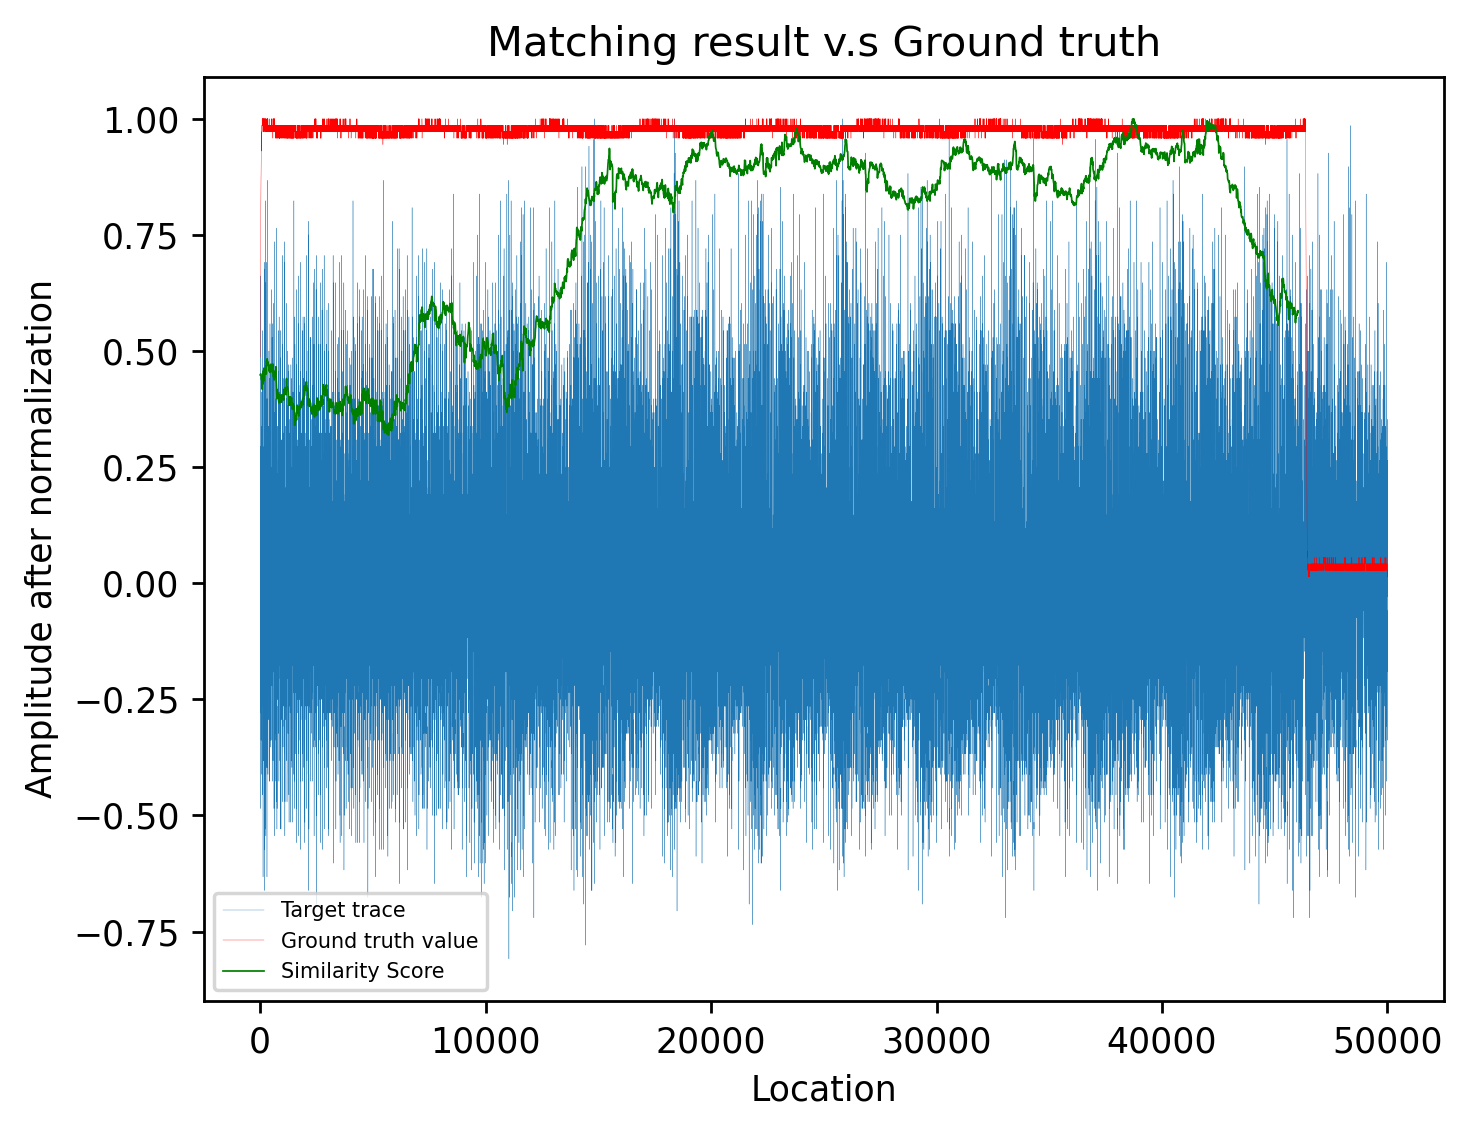

In [18]:
# prepare match result figures for long trace

# length = len(traces_ori[0, :]) # 340_000
ass = 1/2

figsize = plt.figaspect(ass)
# fig, ax = plt.subplots(figsize=figsize)
fig, ax = plt.subplots()

traces_ori_points = np.array(range(0, len(traces_ori[0, :])))
ax.plot(traces_ori_points, traces_ori[0, :]/np.max(traces_ori[0, :]), linewidth=0.1)

# traces_ori_points = np.array(range(start_ori, end_ori))
# ax.plot(traces_ori_points, traces_ori[0, start_ori:end_ori]/np.max(traces_ori[0, start_ori:end_ori]), linewidth=0.1)
# ax.plot(traces_ori[0, :], linewidth=0.1)
# ax.set_title('Unknown side channel trace (zoom in)')
# ax.ylabel('Similarity Score')
# ax.set_xlabel('Location')

# figsize = plt.figaspect(ass)
# # fig, ax = plt.subplots(figsize=figsize)
# fig, ax = plt.subplots()

ax.plot(traces_ori_points, trigger_trace_ori[0, :]/np.max(trigger_trace_ori[0, :]), linewidth=0.1, color='red')

# ax.plot(traces_ori_points, trigger_trace_ori[0, start_ori:end_ori]/np.max(trigger_trace_ori[0, start_ori:end_ori]), linewidth=0.1, color='red')

# ax.plot(similar_result[:], linewidth=0.1, color='green')
# ax.set_title('Ground truth location (zoom in)')
# ax.ylabel('Similarity Score')
# ax.set_xlabel('Location')


# # plt.savefig("ground-truth-long-zoomin.png")
# plt.show()

# plt.savefig("unknown-trace-long-zoomin.png")
# plt.show()


# figsize = plt.figaspect(ass)
# # fig, ax = plt.subplots(figsize=figsize)
# fig, ax = plt.subplots()

similar_result_points = np.array(range(0, len(similar_result[:])))*match_stride
ax.plot(similar_result_points, similar_result[:]/np.max(similar_result[:]), linewidth=0.5, color='green')
# ax.plot(similar_result_points, similar_result[:], linewidth=0.3, color='green')

# similar_result_points = np.array(range(start_ori//match_stride, end_ori//match_stride))*match_stride
# ax.plot(similar_result_points, similar_result[start_ori//match_stride:end_ori//match_stride]/np.max(similar_result[start_ori//match_stride:end_ori//match_stride]), linewidth=0.3, color='green')

# ax.plot(similar_result[:], linewidth=0.1, color='green')
ax.set_title('Matching result v.s Ground truth')
ax.set_ylabel('Amplitude after normalization')
ax.set_xlabel('Location')
ax.legend([
        "Target trace", 
        "Ground truth value",
        "Similarity Score",
    ],
    prop={'size': 6}
)

# similar_result_range = list(range(start_ori//match_stride, end_ori//match_stride))
# similar_result_range_interp = list(range(start_ori, end_ori))
# similar_result_interp =  np.interp(similar_result_range_interp, similar_result_range, similar_result[start_ori//match_stride:end_ori//match_stride])
# ax.plot(similar_result_interp, linewidth=0.1, color='green')

plt.savefig("aes_random_disable-freq-match-result-vs-groundtruth-long-large.png")
# plt.savefig("aes_random-sad-match-result-vs-groundtruth-long-large.png")
# plt.savefig("match-result-vs-groundtruth-long-zoomin.png")
plt.show()

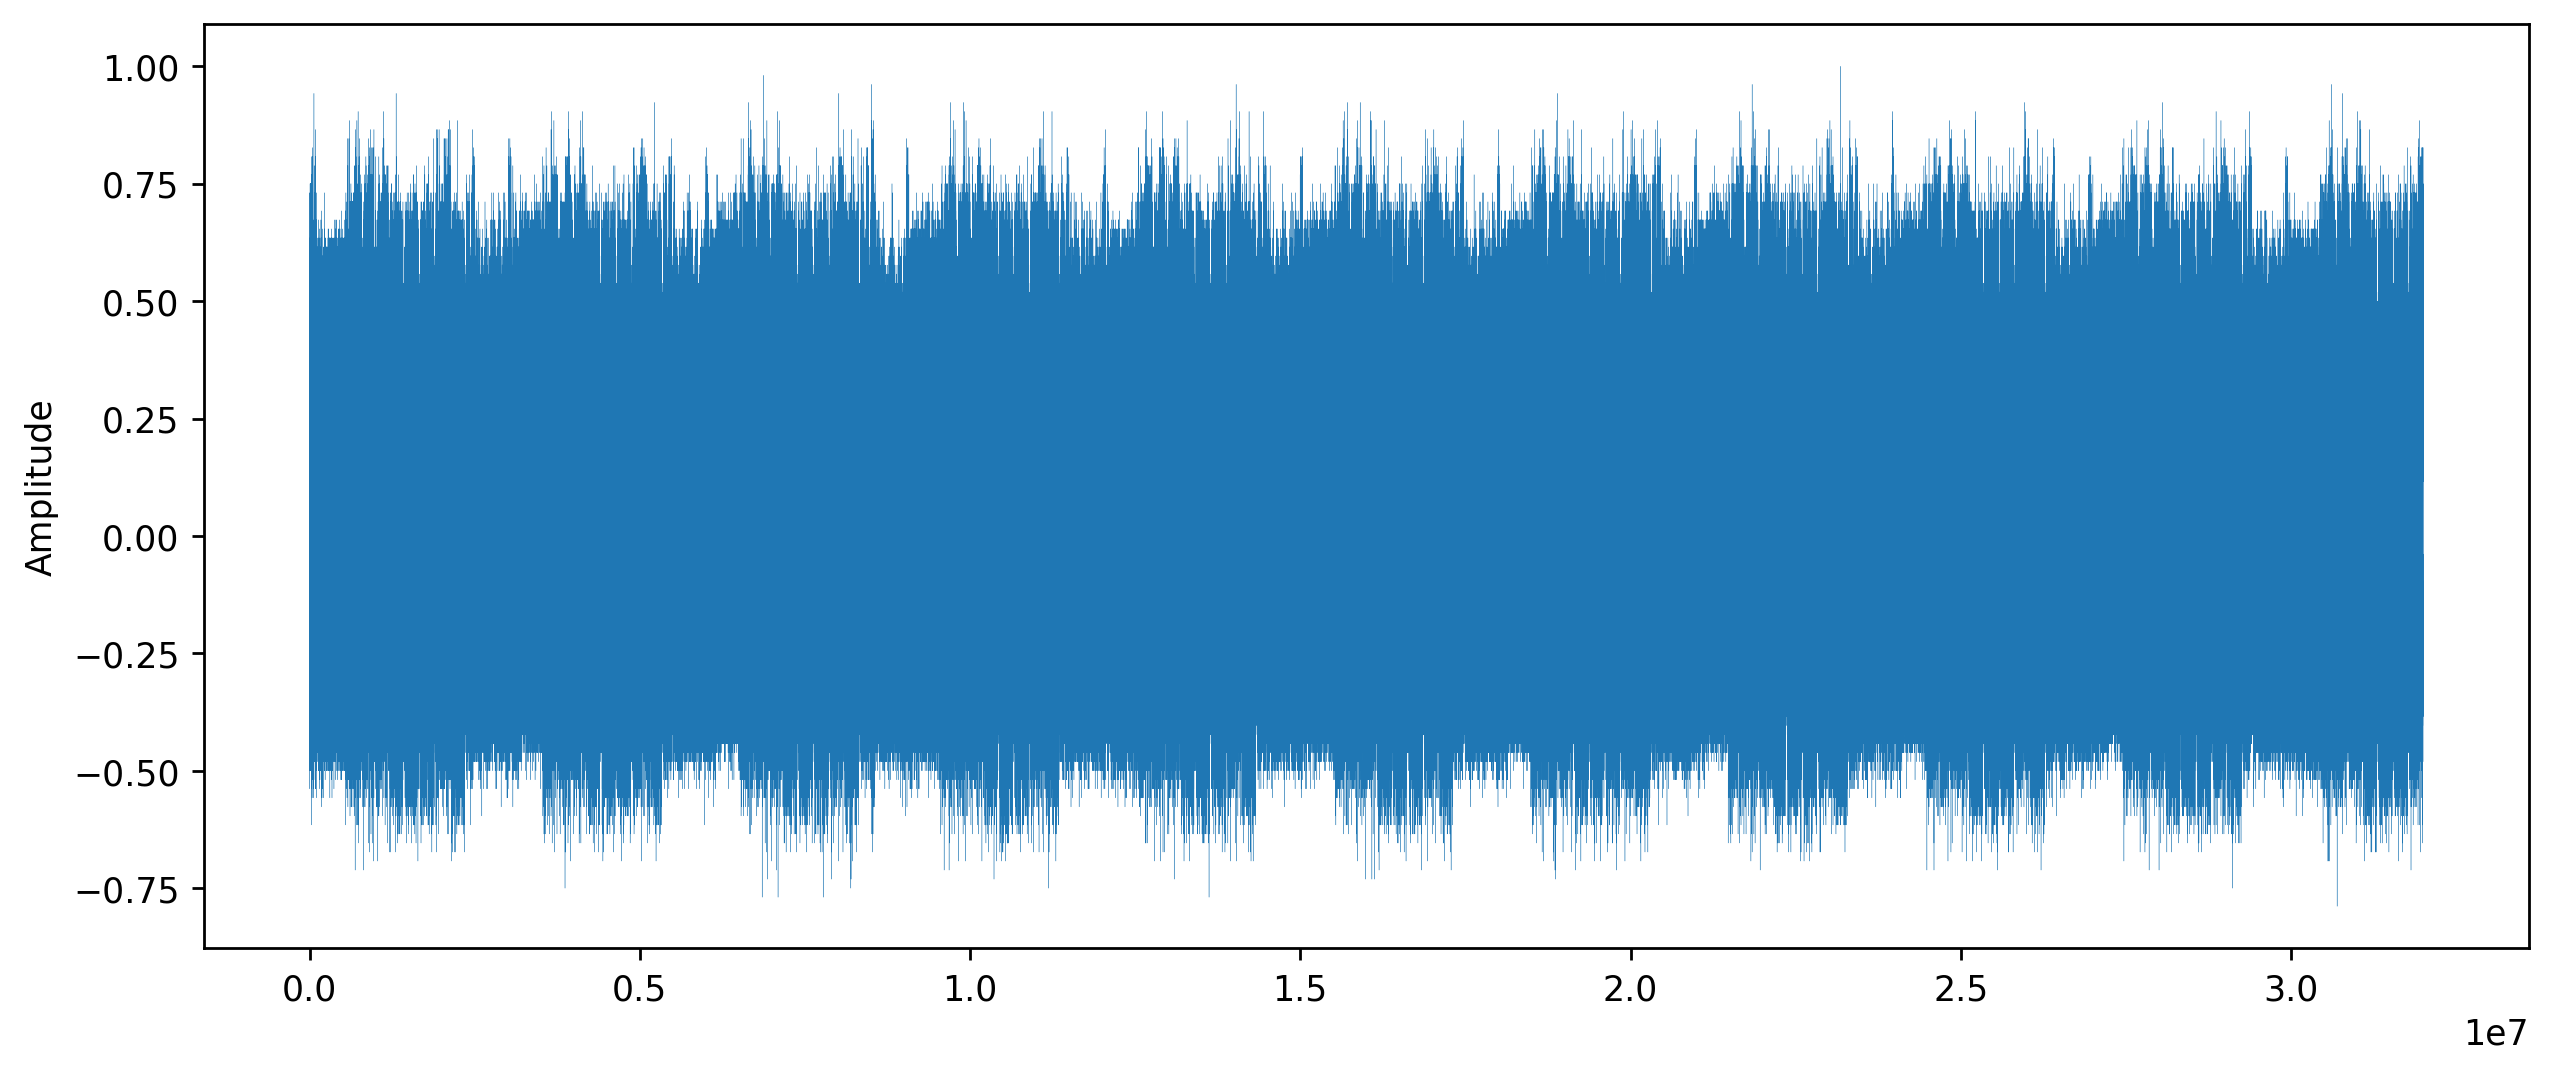

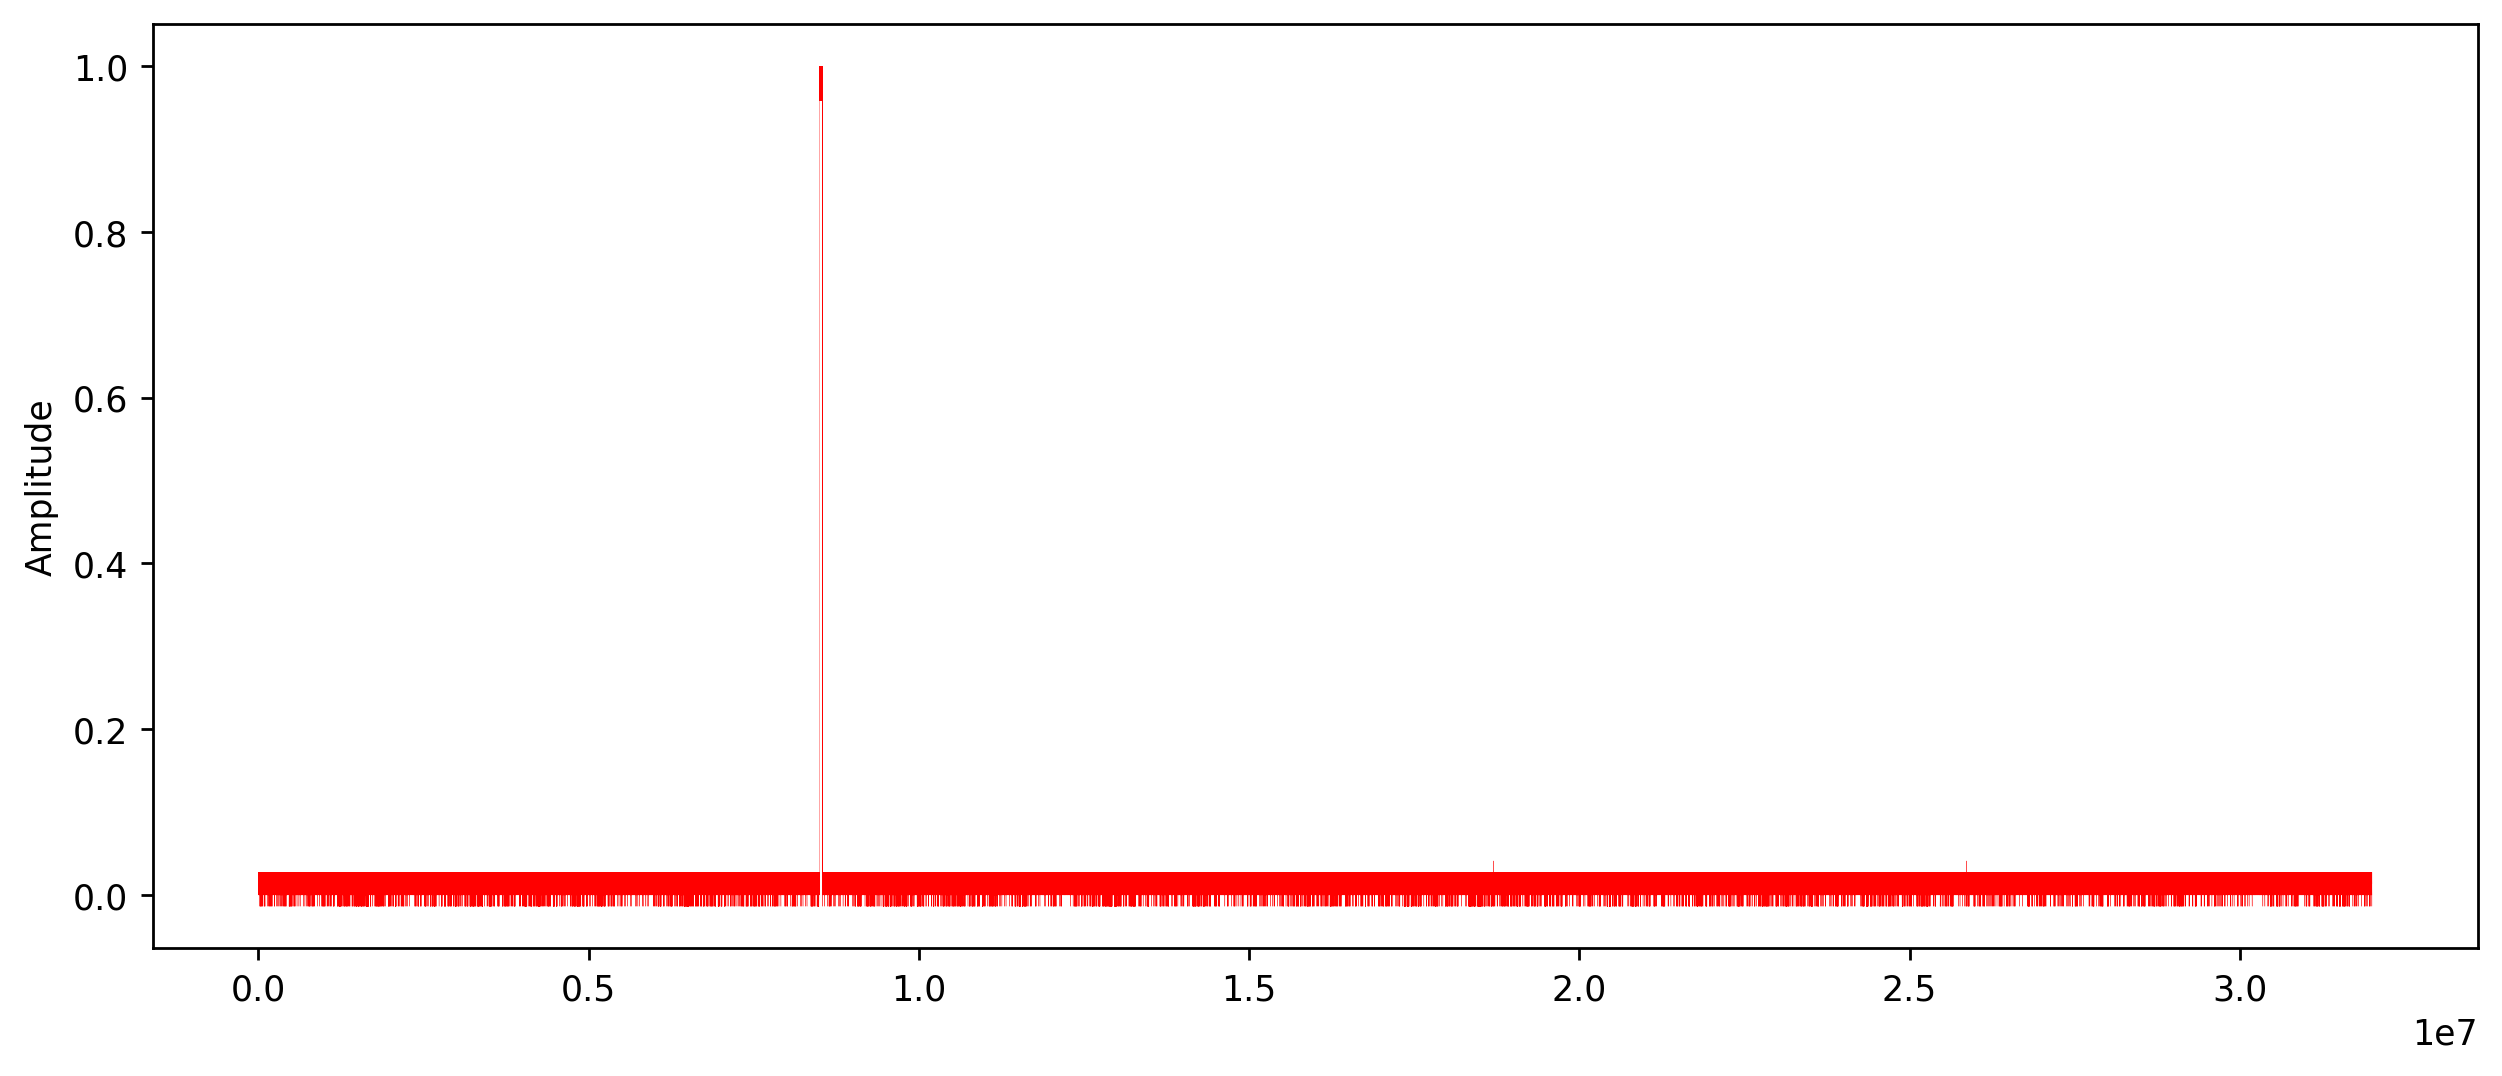

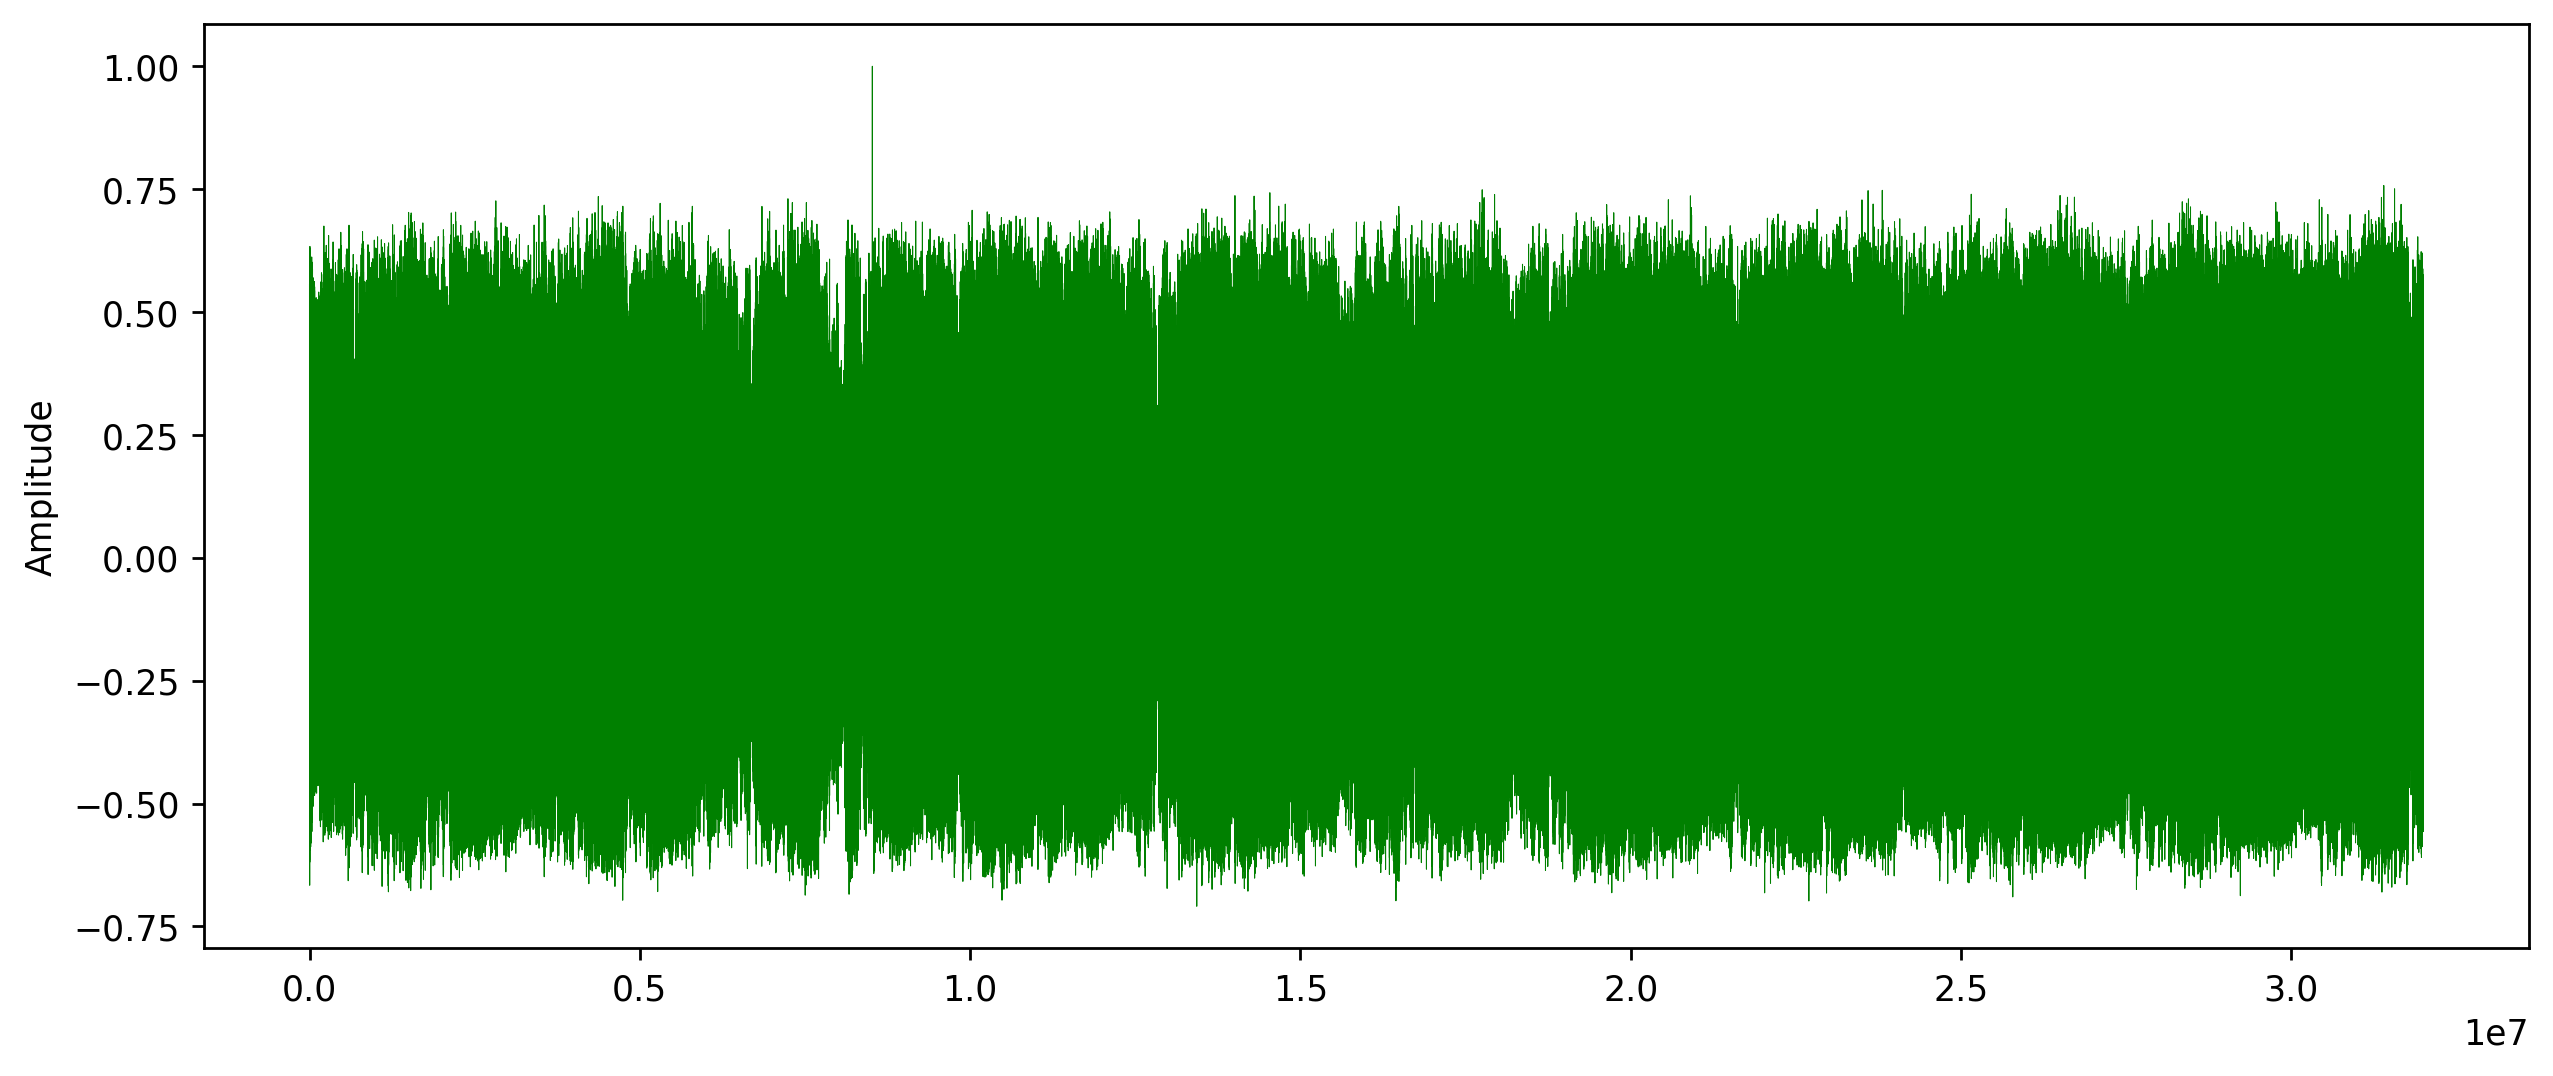

In [51]:
# prepare match result figures for long trace

# length = len(traces_ori[0, :]) # 340_000
ass = 1/2.5

figsize = plt.figaspect(ass)
fig, ax = plt.subplots(figsize=figsize)
# fig, ax = plt.subplots()

# # create a figure with 3 subplots arranged vertically
# fig, axs = plt.subplots(3, 1, figsize=(6, 8))

traces_ori_points = np.array(range(0, len(traces_ori[0, :])))
ax.plot(traces_ori_points, traces_ori[0, :]/np.max(traces_ori[0, :]), linewidth=0.1)

# traces_ori_points = np.array(range(start_ori, end_ori))
# ax.plot(traces_ori_points, traces_ori[0, start_ori:end_ori]/np.max(traces_ori[0, start_ori:end_ori]), linewidth=0.1)
# ax.plot(traces_ori[0, :], linewidth=0.1)
# ax.set_title('Unknown side channel trace (zoom in)')
ax.set_ylabel('Amplitude')
# ax.set_xlabel('Location')

# plt.savefig("target-trace-3-1.png")
plt.show()

# figsize = plt.figaspect(ass)
fig, ax = plt.subplots(figsize=figsize)
# fig, ax = plt.subplots()

ax.plot(traces_ori_points, trigger_trace_ori[0, :]/np.max(trigger_trace_ori[0, :]), linewidth=0.1, color='red')

# ax.plot(traces_ori_points, trigger_trace_ori[0, start_ori:end_ori]/np.max(trigger_trace_ori[0, start_ori:end_ori]), linewidth=0.1, color='red')

# ax.plot(similar_result[:], linewidth=0.1, color='green')
# ax.set_title('Ground truth location (zoom in)')
ax.set_ylabel('Amplitude')
# ax.set_xlabel('Location')

# plt.savefig("groundtruth-3-2.png")
plt.show()

# figsize = plt.figaspect(ass)
fig, ax = plt.subplots(figsize=figsize)
# fig, ax = plt.subplots()

similar_result_points = np.array(range(0, len(similar_result[:])))*50
ax.plot(similar_result_points, similar_result[:]/np.max(similar_result[:]), linewidth=0.3, color='green')

# similar_result_points = np.array(range(start_ori//50, end_ori//50))*50
# ax.plot(similar_result_points, similar_result[start_ori//50:end_ori//50]/np.max(similar_result[start_ori//50:end_ori//50]), linewidth=0.3, color='green')

# ax.plot(similar_result[:], linewidth=0.1, color='green')
# ax.set_title('Matching result v.s Ground truth')
ax.set_ylabel('Amplitude')
# ax.set_xlabel('Location')
# ax.legend([
#         "Target trace",
#         "Ground truth value",
#         "Similarity Score",
#     ],
#     prop={'size': 6}
# )

# similar_result_range = list(range(start_ori//50, end_ori//50))
# similar_result_range_interp = list(range(start_ori, end_ori))
# similar_result_interp =  np.interp(similar_result_range_interp, similar_result_range, similar_result[start_ori//50:end_ori//50])
# ax.plot(similar_result_interp, linewidth=0.1, color='green')

# plt.savefig("match-result-vs-groundtruth-long-large.png")
# plt.savefig("match-result-vs-groundtruth-long-zoomin.png")
# plt.savefig("match-result-3-3.png")
plt.show()

In [20]:
raise

RuntimeError: No active exception to reraise

In [22]:
from scipy import signal, stats

def get_t_p(a, b):
    print(stats.levene(a, b))
    t, p= stats.ttest_ind(a,b, equal_var=False)
    print("t = " + str(t))
    print("p = " + str(2*p))
    return t, p

trigger_ori_edges = get_trigger_edges(trigger_trace_ori[0, :], 0.5)

print(trigger_ori_edges)

inner_edges = [trigger_ori_edges[0][0]//50, trigger_ori_edges[1][0]//50]
inner = similar_result[inner_edges[0]:inner_edges[1]]
outter = similar_result[:inner_edges[0]] + similar_result[inner_edges[1]:]

print(inner[:10])
print(outter[:10])

get_t_p(inner, outter)

[[8496983]
 [8543464]]
[0.41545437153932024, 0.40923458280623326, 0.3949314231634368, 0.3962868438988255, 0.40600982516356554, 0.39905809875566906, 0.39352788201965766, 0.3872045417577608, 0.3885494321664704, 0.38708988313041326]
[0.35536601559062875, 0.36036761672850176, 0.35718866726763665, 0.33687960167629966, 0.34270578769355486, 0.3410845172394388, 0.3372535543132099, 0.33737285778354154, 0.3537597067894251, 0.35397262720926503]
LeveneResult(statistic=3.4890273235635725, pvalue=0.061777329116768025)
t = 64.5234048856675
p = 0.0


(64.5234048856675, 0.0)

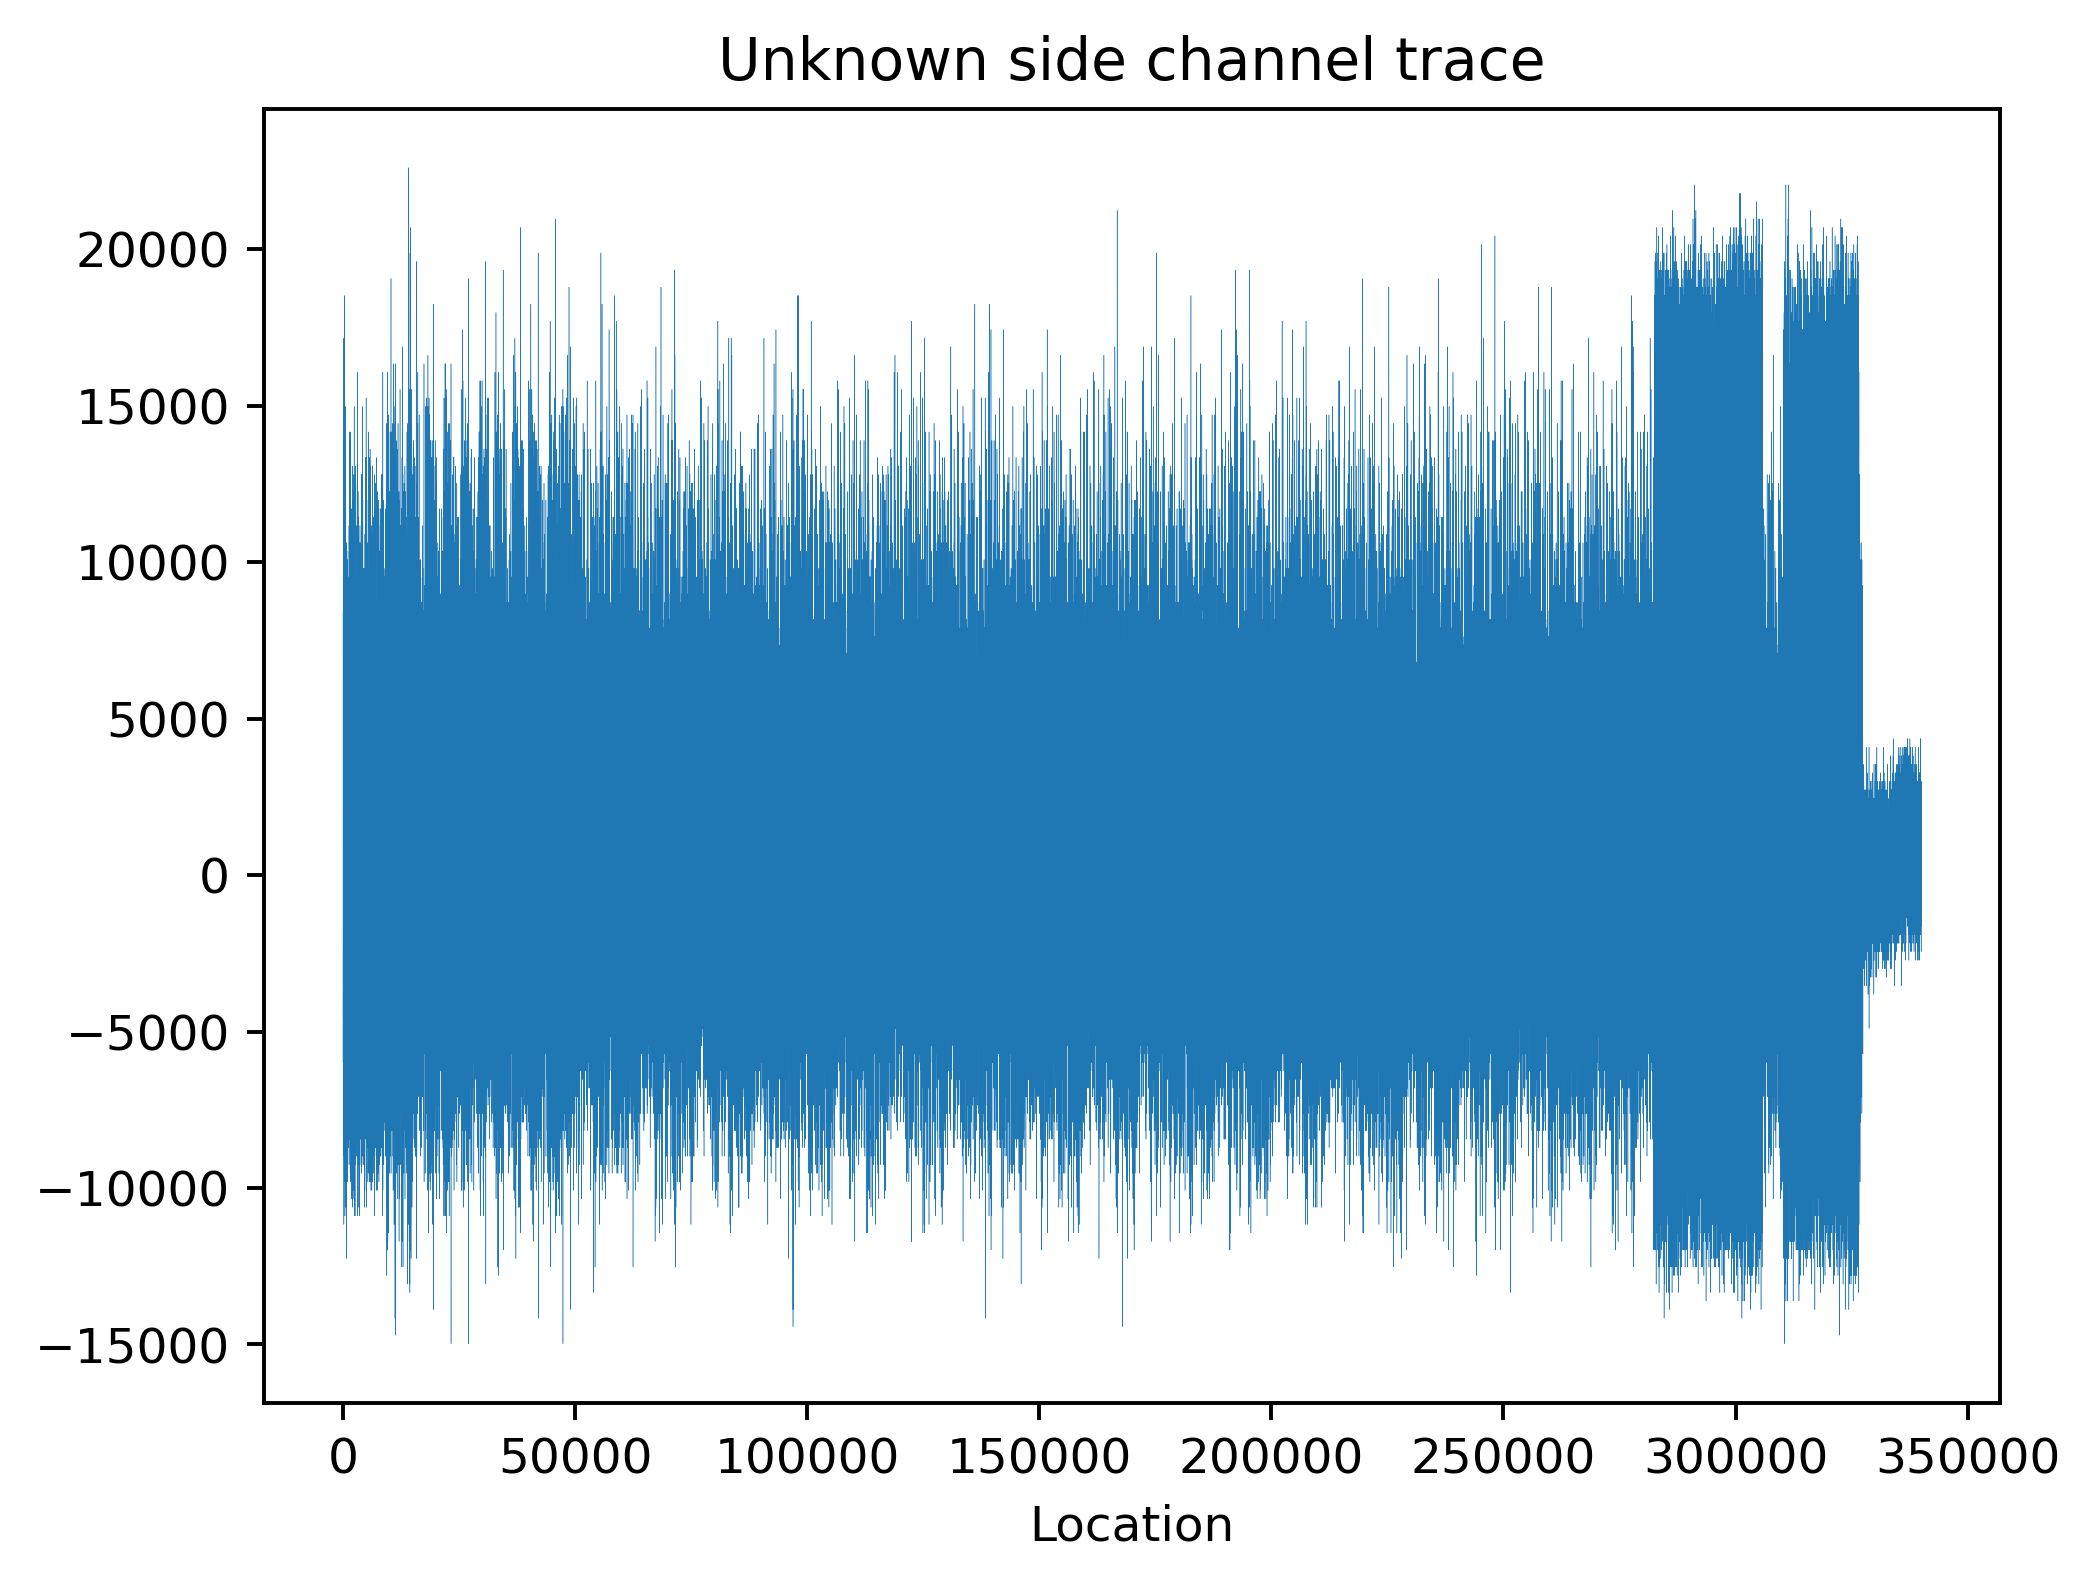

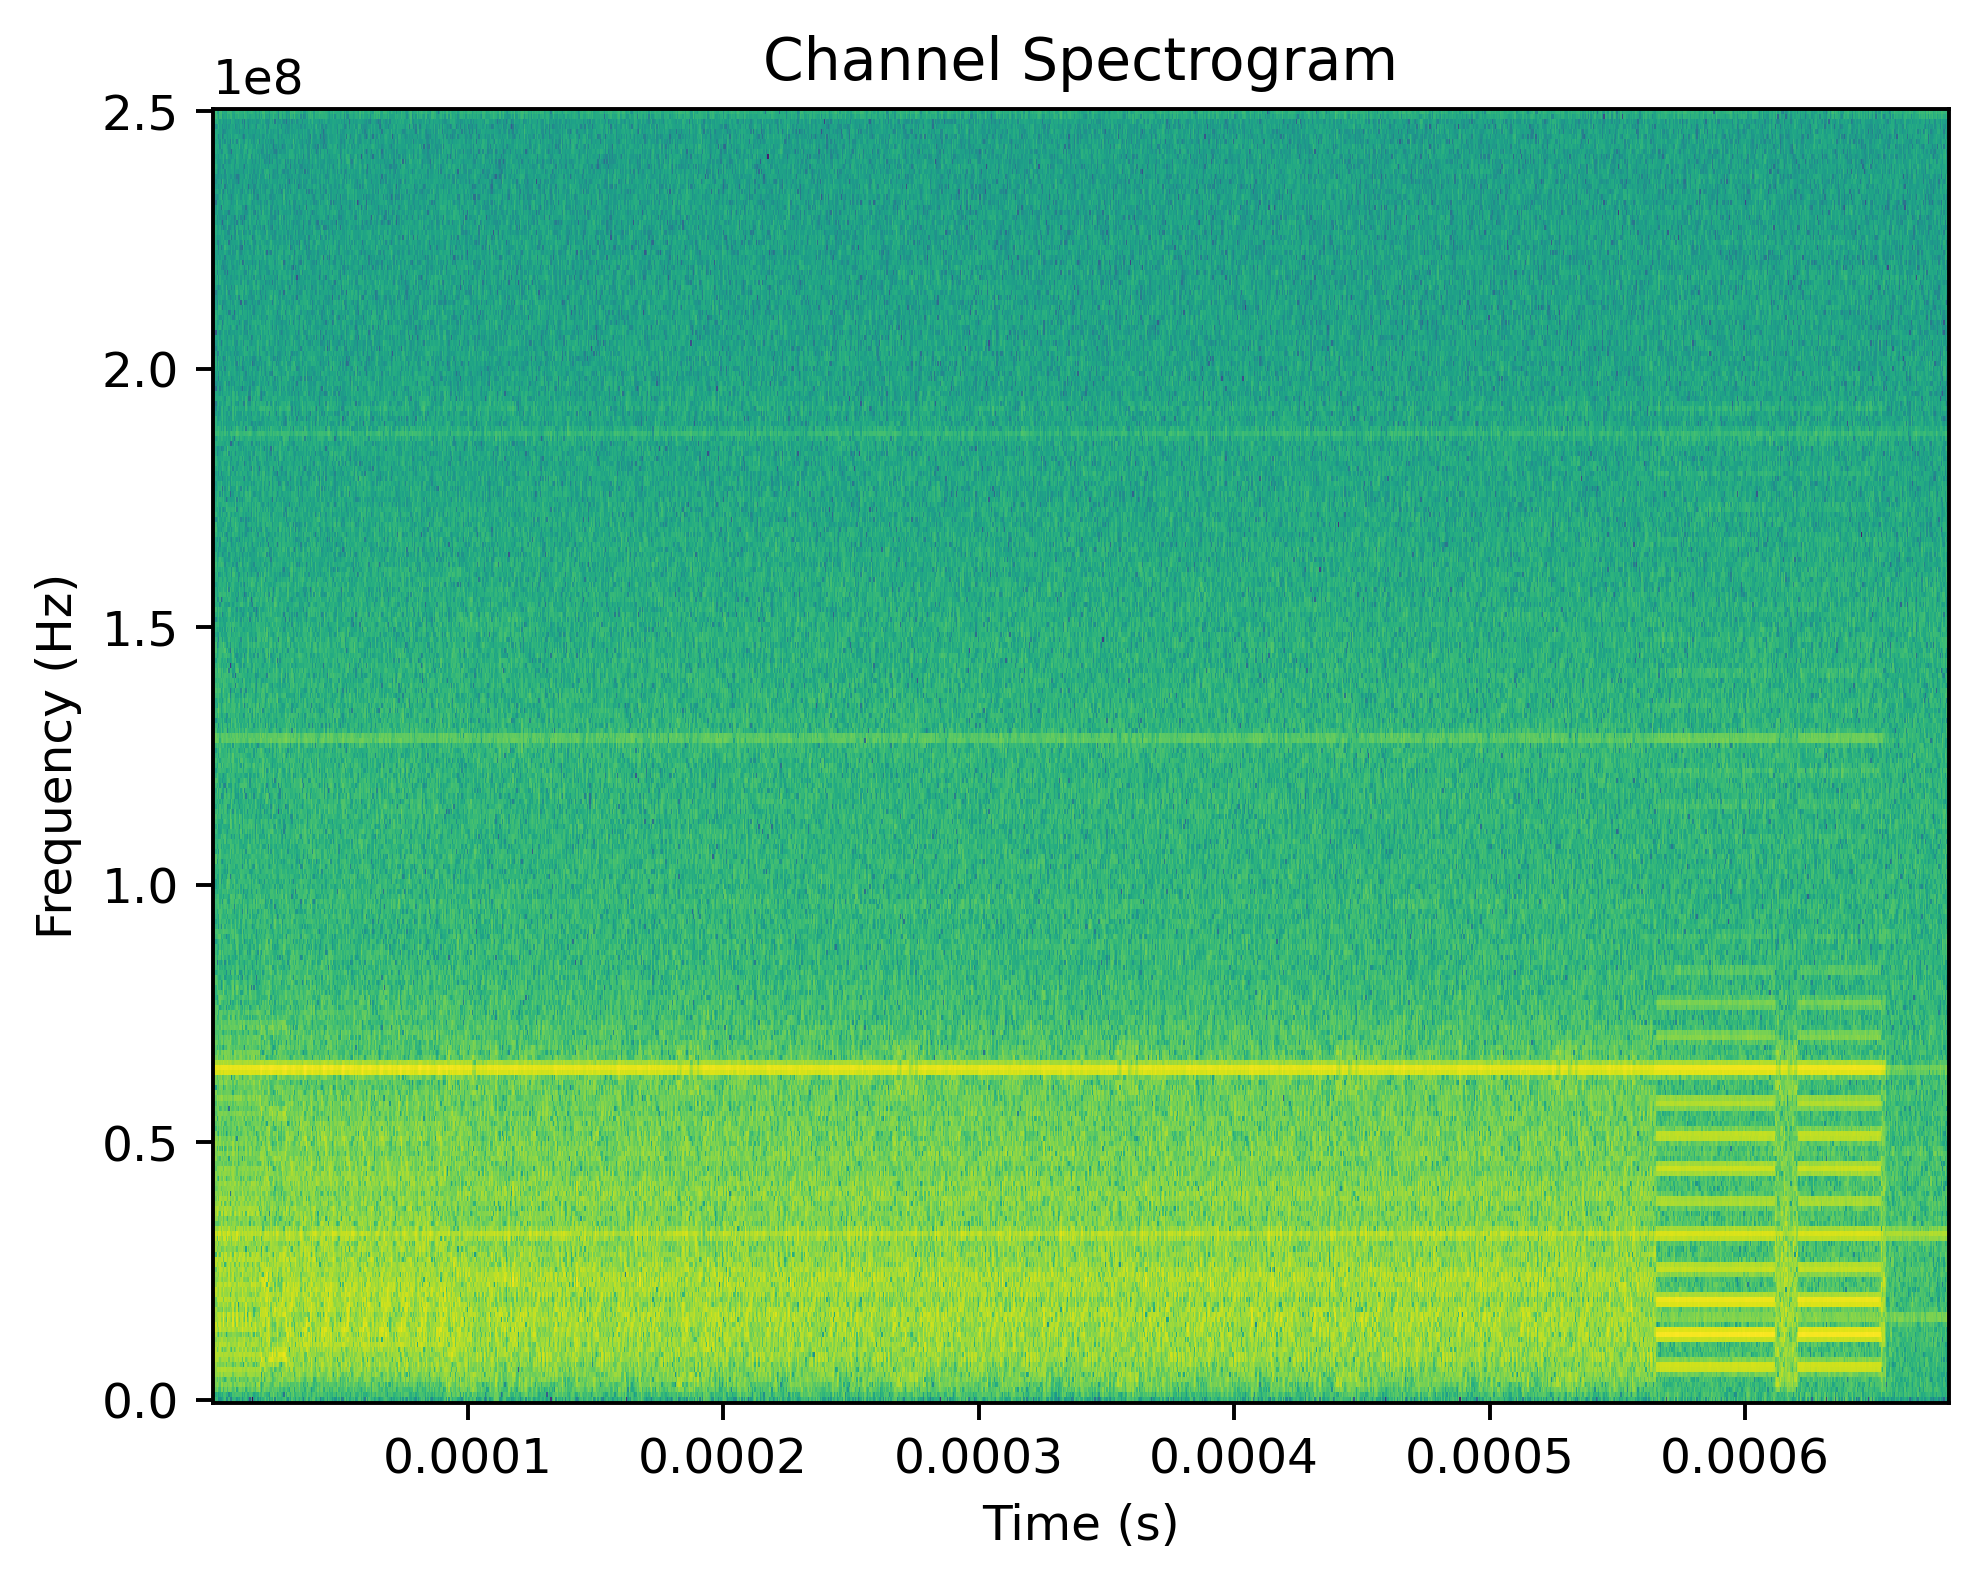

In [ ]:
length = 340_000
ass = 1/2

figsize = plt.figaspect(ass)
# fig, ax = plt.subplots(figsize=figsize)
fig, ax = plt.subplots()

ax.plot(traces_ori[0, :length], linewidth=0.1)
ax.set_title('Unknown side channel trace')
# ax.ylabel('Similarity Score')
ax.set_xlabel('Location')

# plt.savefig("unknown-trace-example.png")
plt.show()

sample_interval = 2e-9 # 2ns
plot_spectrom(channel_data=traces_ori[0, :length], fs=int(1/sample_interval)) 

# figsize = plt.figaspect(ass)
# # fig, ax = plt.subplots(figsize=figsize)
# fig, ax = plt.subplots()

# ax.plot(similar_result[:length], linewidth=0.1, color='green')
# ax.set_title('Similarity Score')
# # ax.ylabel('Similarity Score')
# ax.set_xlabel('Location')


# plt.savefig("match-result-example.png")
plt.show()

In [ ]:
raise

RuntimeError: No active exception to reraise

In [ ]:
trace_file = '..\\raw_traces\\nrf52840.tinyaes.O3.patch.all\\nrf52840.tinyaes.O3.patch.all_21.csv'
data = get_pico3203D_data_csv(trace_file)

['时间', '通道 A', '通道 B']
['(us)', '(V)', '(mV)']


In [ ]:
plot_channel_a(data)
plot_channel_b(data)
plot_spectrom(data)

In [ ]:
# times = data[0, :]
# channel_b_data = data[2, :]

# # Set up the parameters for the spectrogram
# fs = int(1/(times[1]-times[0])) * (1e6)  # Sampling frequency (Hz)
# nperseg = 512  # Number of points in each segment
# noverlap = nperseg // 2  # Overlap between segments
# window = signal.windows.hann(nperseg)  # Window function

# # Calculate the spectrogram using Scipy
# f, t, Sxx = signal.spectrogram(channel_b_data, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)

# # # low pass filter
# # nyquist_freq = fs / 2  # Nyquist frequency
# # cutoff_freq = 50_000_000  # Cutoff frequency (Hz)
# # b, a = signal.butter(4, cutoff_freq/nyquist_freq, 'low')  # Generate filter coefficients
# # filtered_channel_b_data = signal.lfilter(b, a, channel_b_data)

# # # Calculate the spectrogram using Scipy
# # f, t, Sxx = signal.spectrogram(filtered_channel_b_data, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)

# # Plot the spectrogram
# # plt.pcolormesh(t, f, Sxx)
# plt.pcolormesh(t, f, 10*np.log10(Sxx))

# plt.ylabel('Frequency (Hz)')
# plt.xlabel('Time (s)')
# plt.title('Channel A Spectrogram')
# plt.show()

## Original trace

In [ ]:
trace_file_ori = 'C:\\Users\\hp\\Desktop\\School\\PhdResearch\\trace_collect\\raw_traces\\nrf52840.tinyaes.O3.ori\\nrf52840.tinyaes.O3.ori.2.csv'
data_ori = get_pico3203D_data_csv_csv_csv_csv_csv(trace_file_ori)

NameError: name 'get_pico3203D_data_csv_csv_csv_csv_csv' is not defined

In [ ]:
plot_channel_a(data_ori)
plot_channel_b(data_ori)
plot_spectrom(data_ori)

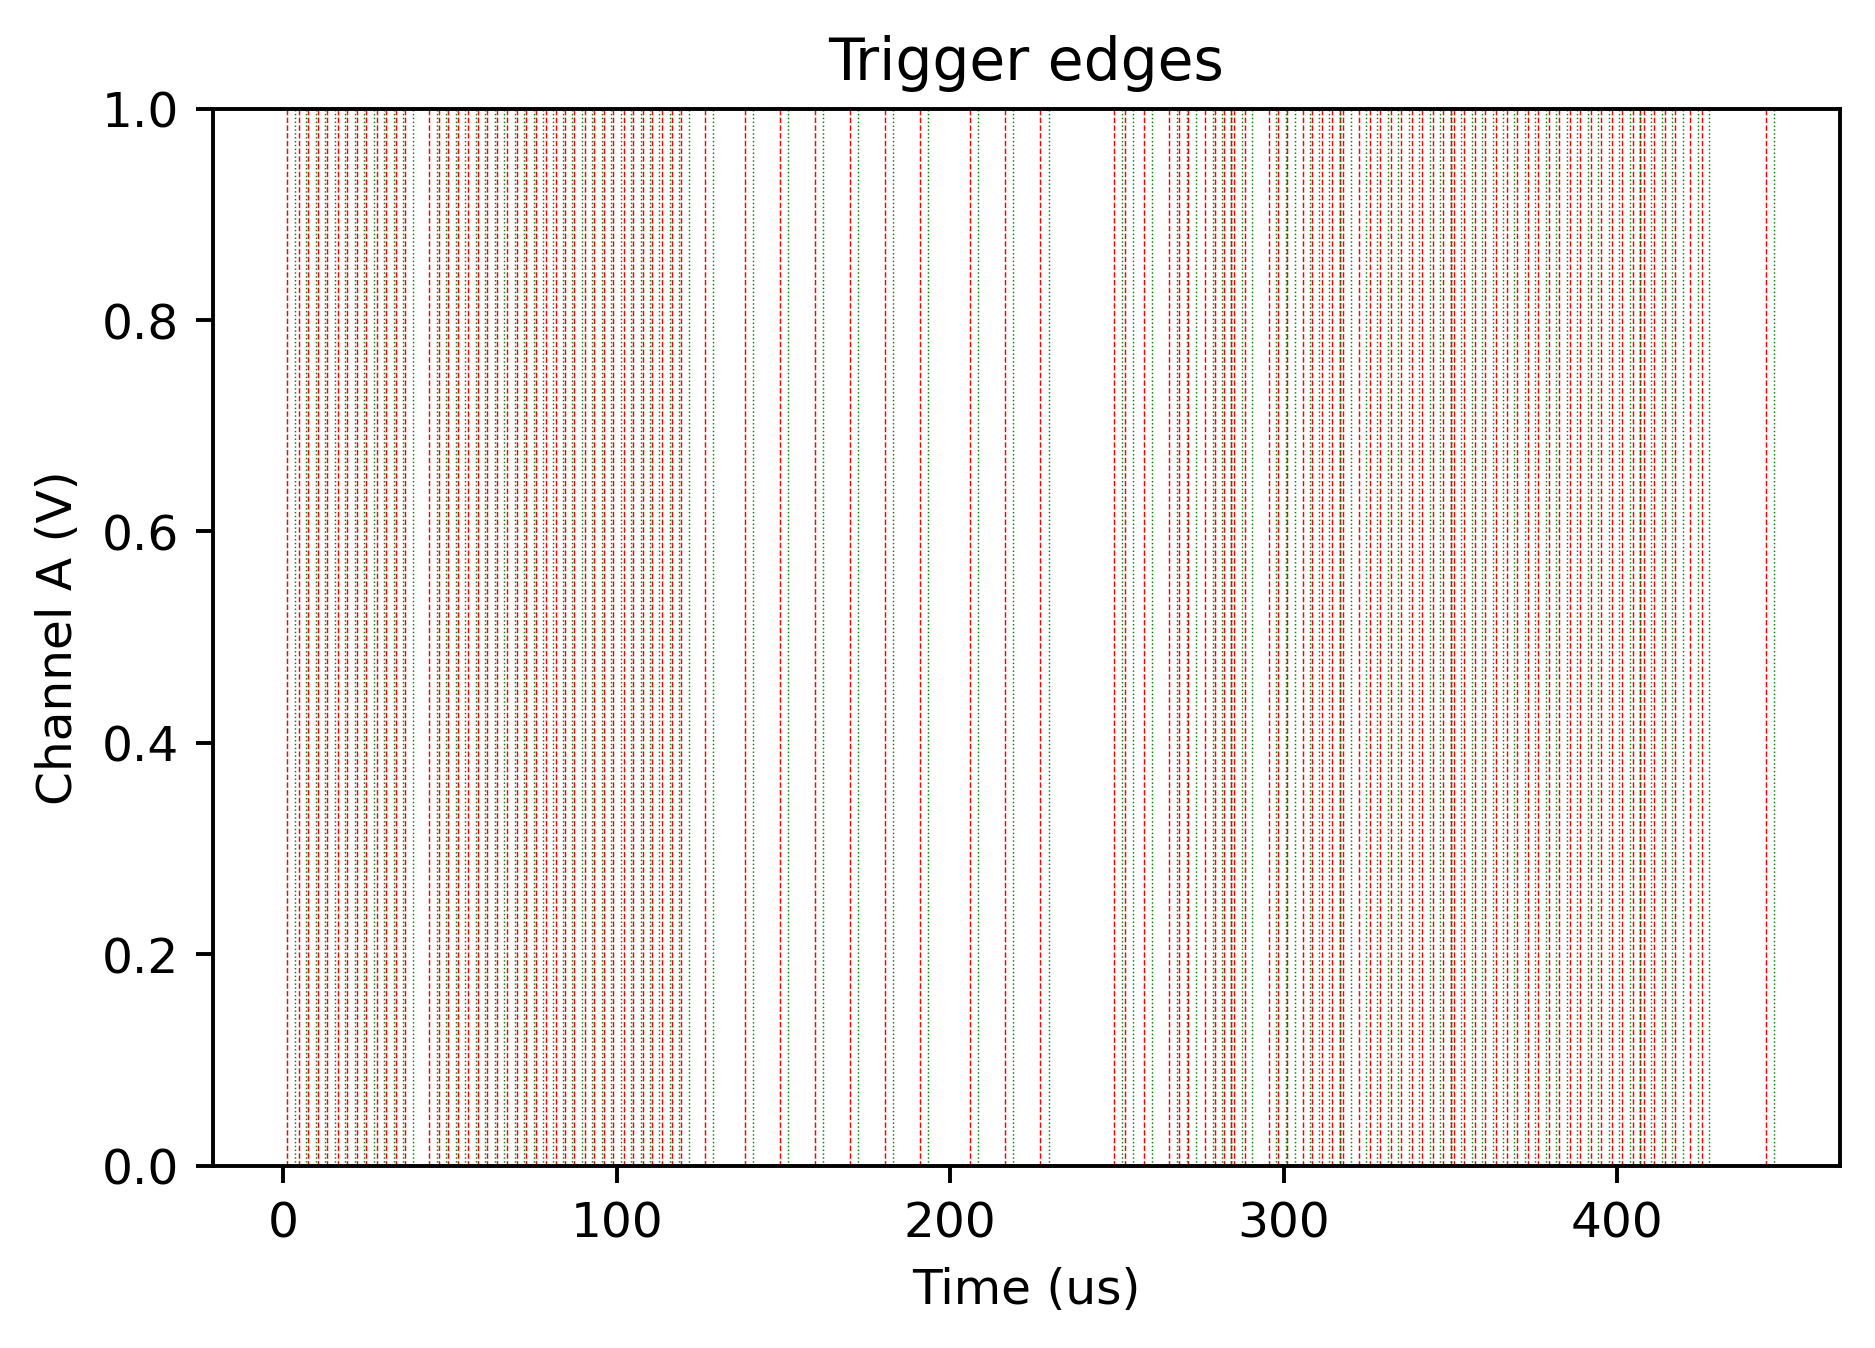

In [ ]:
def get_trigger_edges(data, threshold = 0.3):
    rising_edges = []
    falling_edges = []
    INT_RAISE_CYCLES = 16
    INT_FALL_CYCLES = 12
    MAX_IDX = len(data[1, :])
    mode = 0 # 0 for rising, 1 for falling
    for i,v in enumerate(data[1, :]):
        if mode == 0 and v > threshold:
            mode = 1
            rising_edges.append(max(0, i-INT_RAISE_CYCLES))
            continue
        elif mode == 1 and v < threshold:
            mode = 0
            falling_edges.append(min(MAX_IDX, i + INT_FALL_CYCLES))
            continue
    return np.array([rising_edges, falling_edges])

trigger_edges = get_trigger_edges(data)

# plt.plot(data[0, :], data[1, :], linewidth=0.5)
for edges in trigger_edges[0, :]:
    plt.axvline(x=data[0, edges], color='r', linestyle='--', linewidth=0.3)
for edges in trigger_edges[1, :]:
    plt.axvline(x=data[0, edges], color='g', linestyle=':', linewidth=0.3)

plt.xlabel('Time (us)')
plt.ylabel('Channel A (V)')
plt.title('Trigger edges')
plt.show()

(133162,)


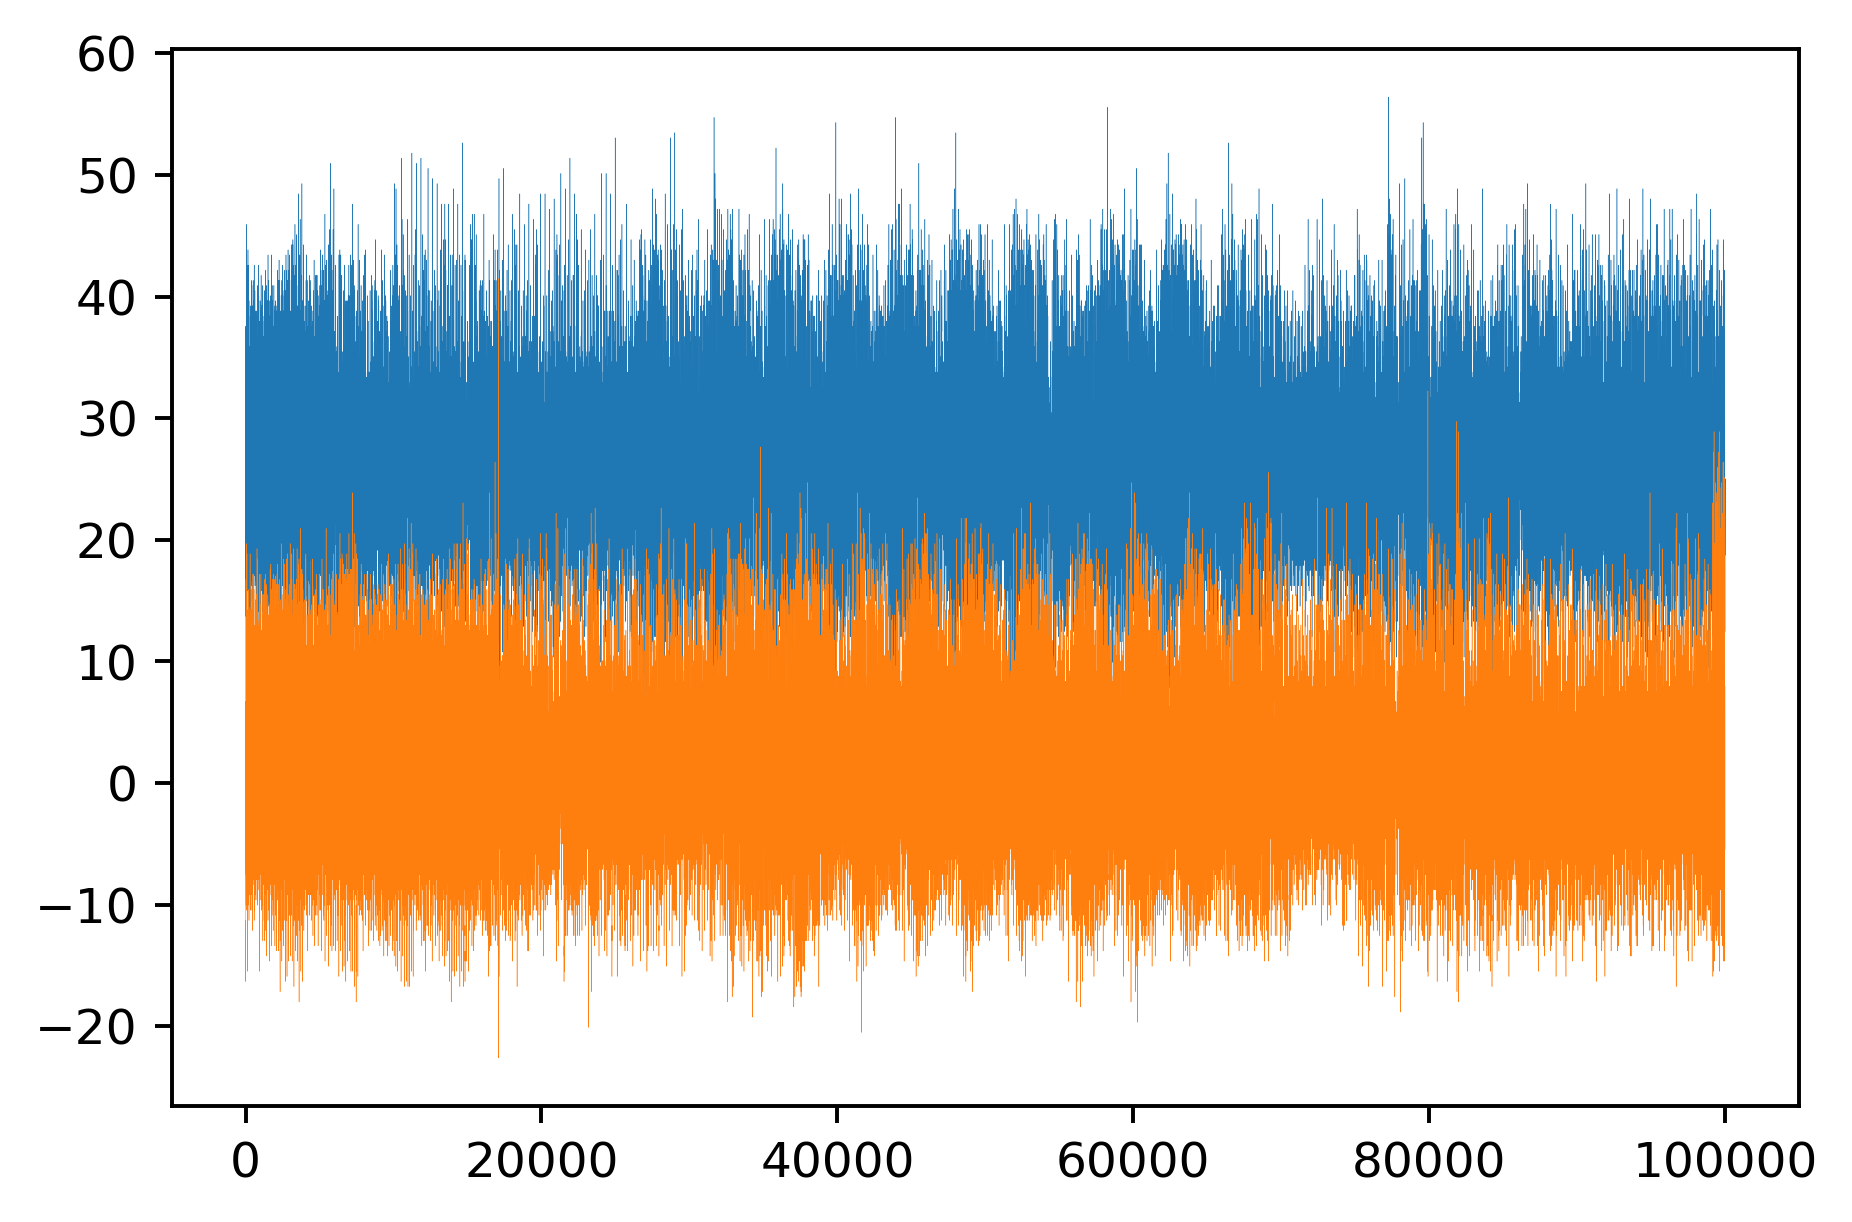

In [ ]:
def remove_trigger_segs(data, trigger_edges):
    trace_output = []
    x = 0
    y = 0
    for i,d in enumerate(data[2,:]):
        if x>= trigger_edges.shape[1]:
            # no edges remain
            trace_output.append(d)
        elif y == 0:
            if i<trigger_edges[y][x]:
                trace_output.append(d)
            else:
                y = 1
        else:
            if i>trigger_edges[y][x]:
                x += 1
                y = 0

    return np.array(trace_output)

trace_without_triggers = remove_trigger_segs(data, trigger_edges)

print(trace_without_triggers.shape)
start_1 = 15_000
start_2 = 1_800


count = 100_000
plt.plot(trace_without_triggers[start_1:start_1+count]+25, linewidth=0.1)
plt.plot(data_ori[2, start_2:start_2+count], linewidth=0.1)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_5764\381624799.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, 10*np.log10(Sxx))


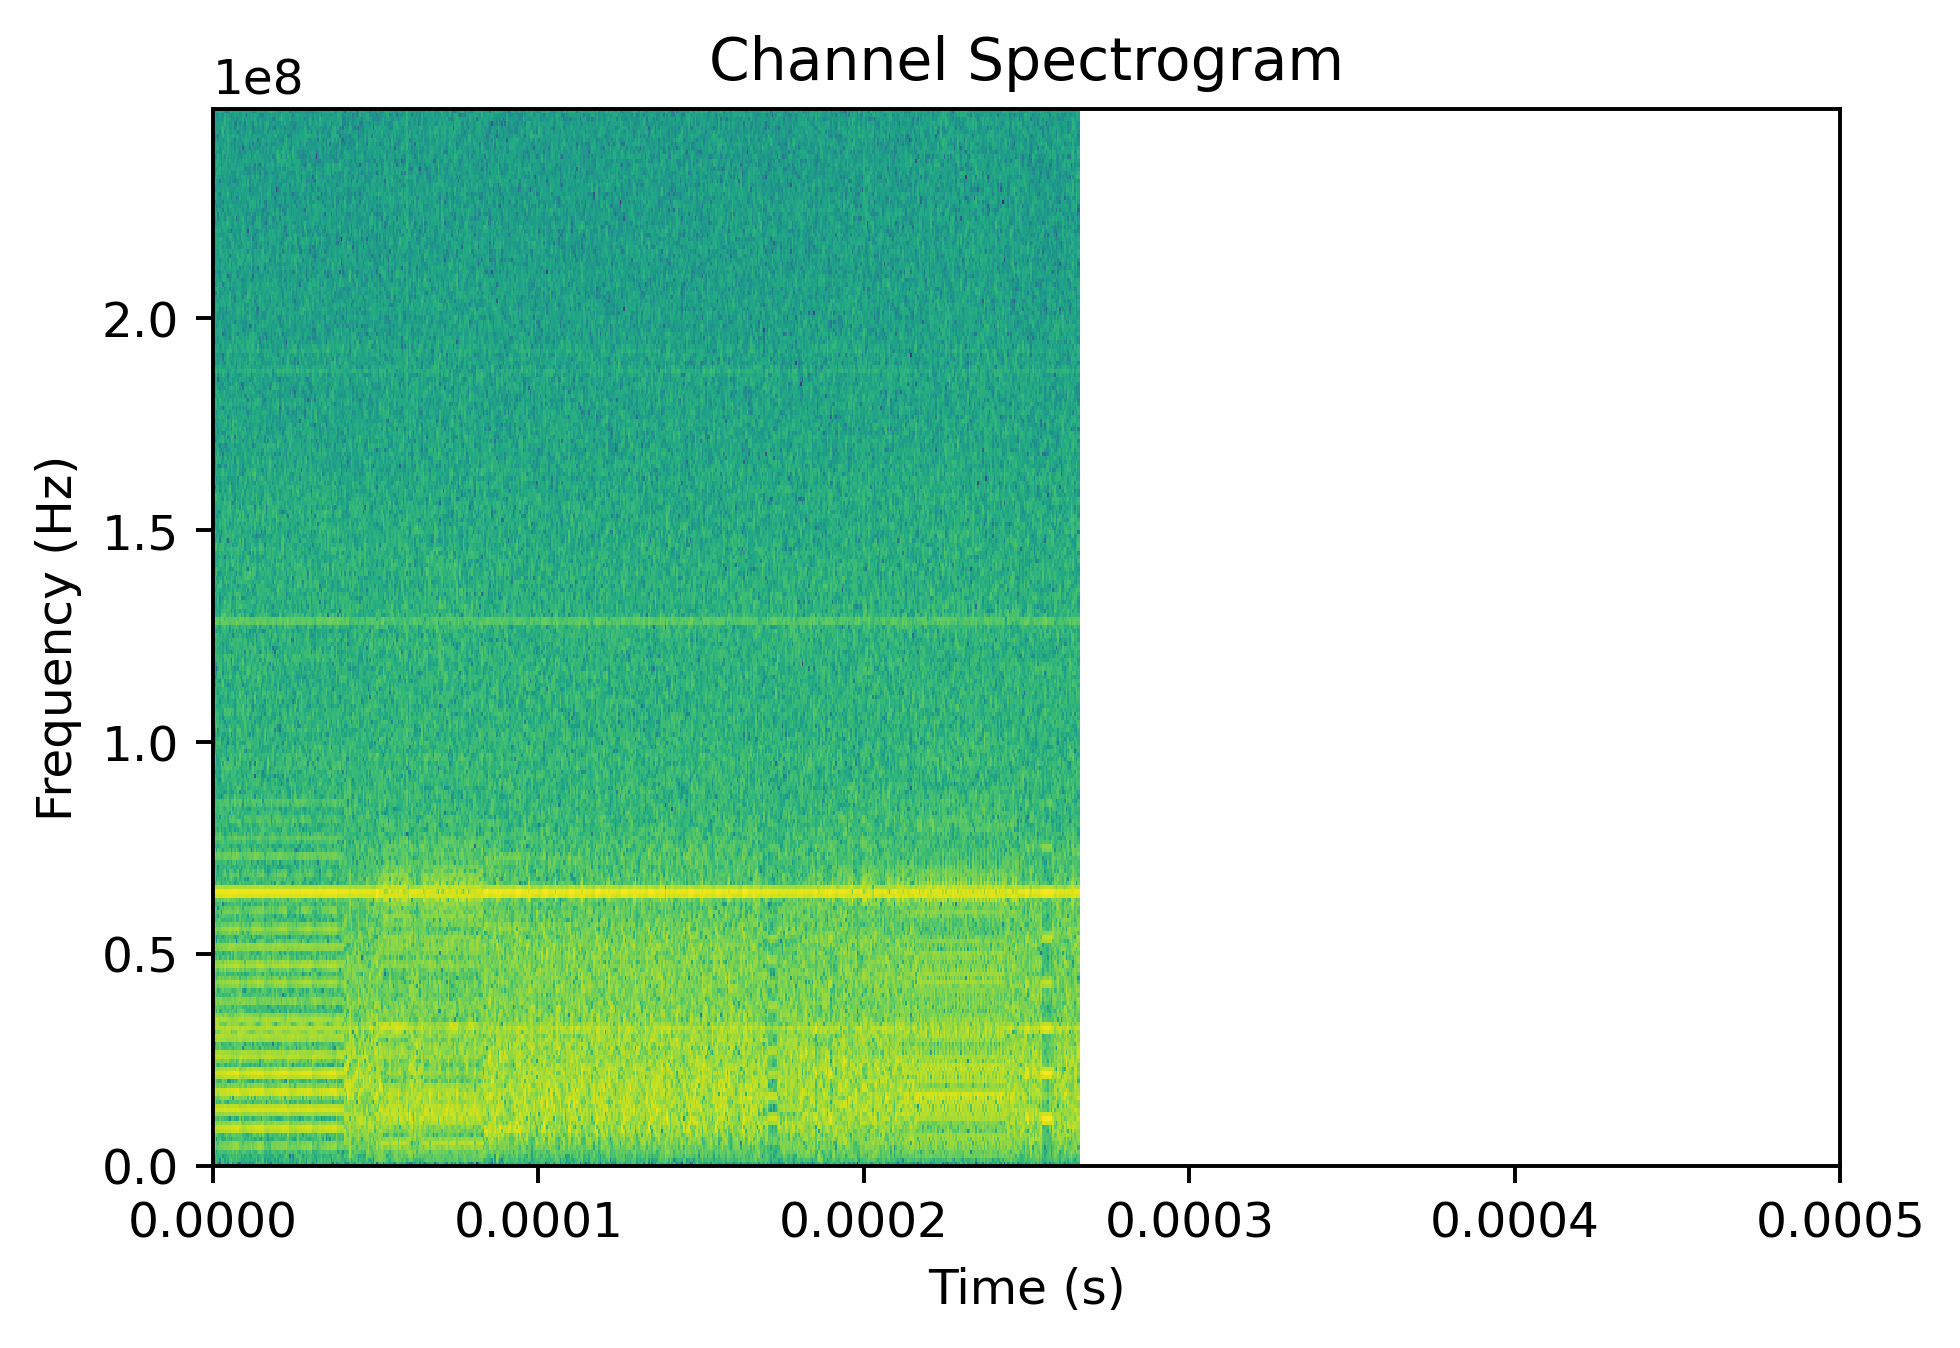

C:\Users\hp\AppData\Local\Temp\ipykernel_5764\2880903798.py:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, 10*np.log10(Sxx))


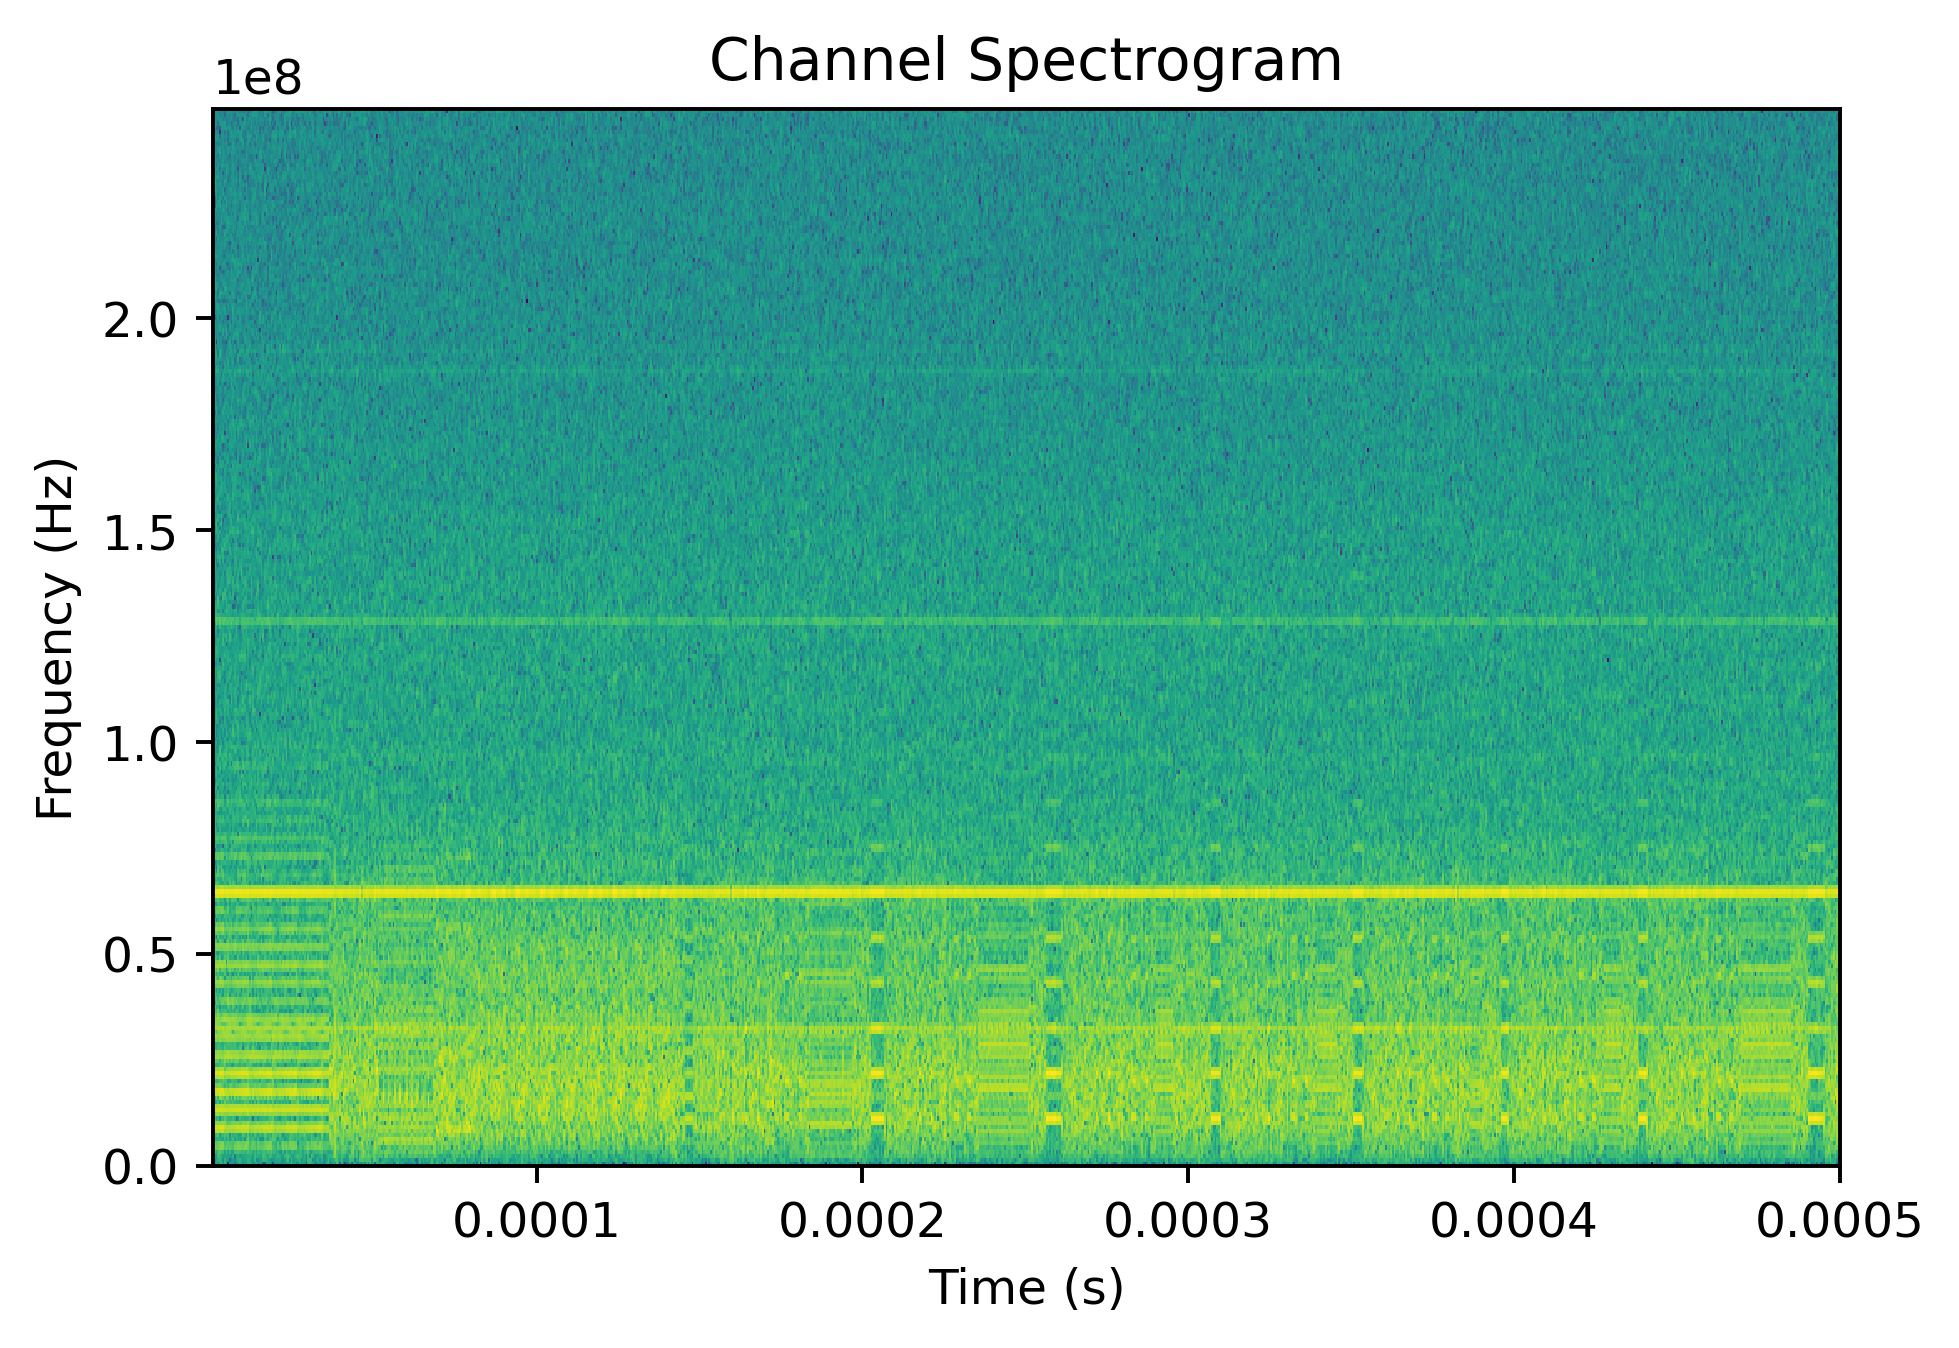

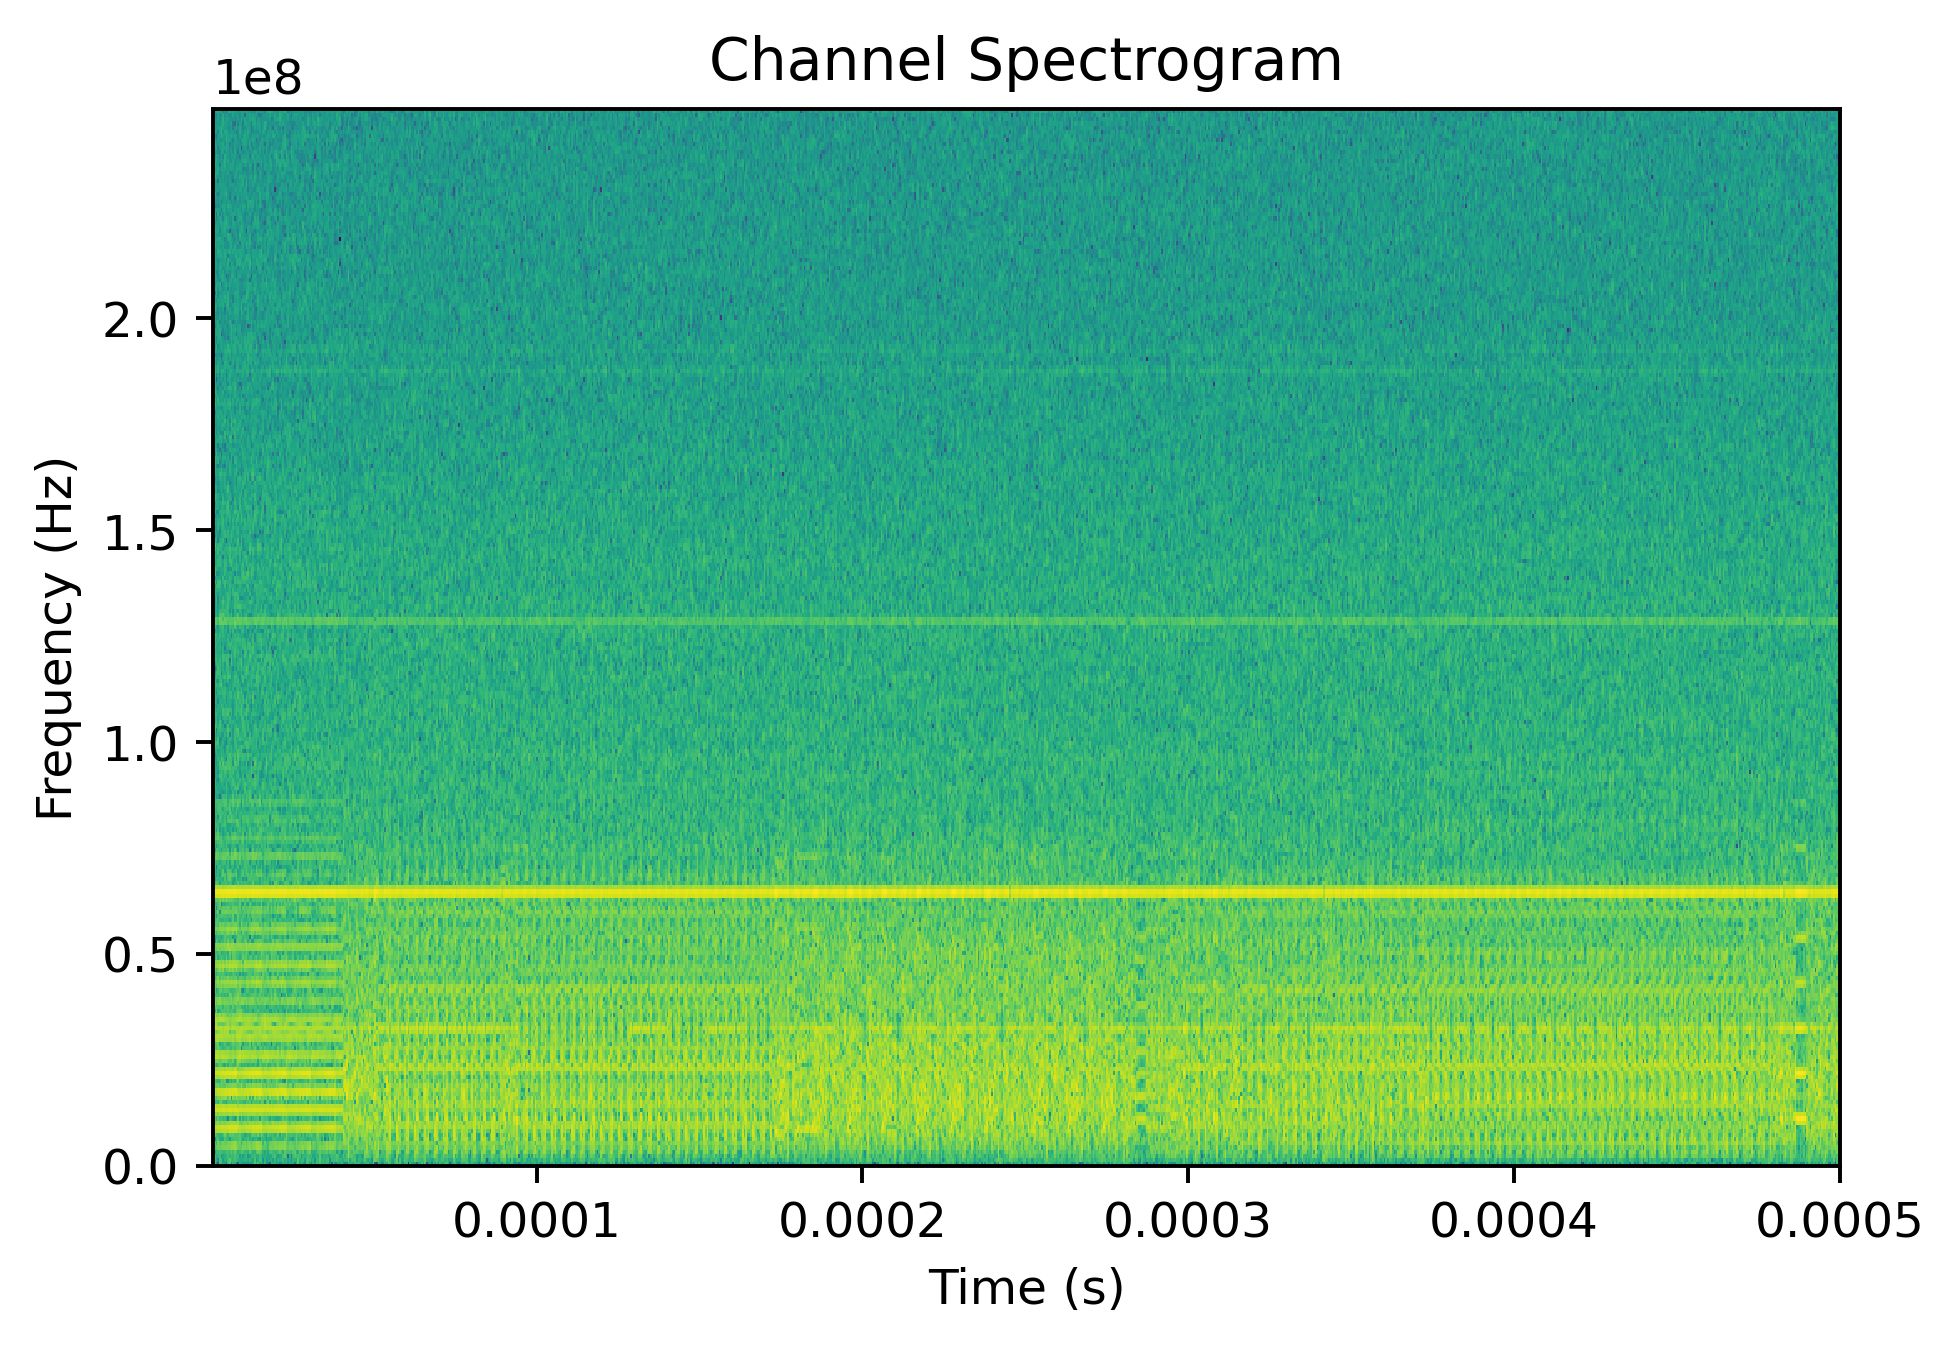

In [ ]:
times = data[0, :]
channel_data_ori = trace_without_triggers
# Set up the parameters for the spectrogram
# FIXME: 1e6 for us
fs = int(1/(times[1]-times[0])) * (1e6)  # Sampling frequency (Hz)
nperseg = 512  # Number of points in each segment
noverlap = nperseg // 2  # Overlap between segments
window = signal.windows.hann(nperseg)  # Window function

# Calculate the spectrogram using Scipy
f, t, Sxx = signal.spectrogram(channel_data_ori, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)

# if low_pass_freq is not None:
# low pass filter
# nyquist_freq = fs / 2  # Nyquist frequency
# cutoff_freq = 500_000_000  # Cutoff frequency (Hz)
# b, a = signal.butter(4, cutoff_freq/nyquist_freq, 'low')  # Generate filter coefficients
# filtered_channel_data_ori = signal.lfilter(b, a, channel_data_ori)

# # Calculate the spectrogram using Scipy
# f, t, Sxx = signal.spectrogram(filtered_channel_data_ori, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)

# Plot the spectrogram
plt.pcolormesh(t, f, 10*np.log10(Sxx))

plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('Channel Spectrogram')
plt.xlim((0, 0.0005))
plt.show()

plot_spectrom(data_ori)
plot_spectrom(data)

In [ ]:
data.shape

(3, 250004)